### Import Needed Packages

In [1]:
import numpy as np
import pandas as pd
import butterpy as bp
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

### Create Time and Flux Characteristic for a 5 and 7 Day Period Star

In [44]:
periods = [9, 6]

star = bp.regions(
    butterfly = True, 
    activity_rate = 1, 
    cycle_length = 10, 
    cycle_overlap = 2, 
    decay_time =(10),
    max_ave_lat = 45, 
    min_ave_lat = 20,
    alpha_med = (3*3e-4),
    tsim = 365*10
    )

i = 1
for p in periods:
    
    globals()[f'spots{i}'] = bp.Spots(
    star, 
    alpha_med = (3*3e-4), 
    period = p,
    incl = 1, 
    decay_timescale = 10, 
    diffrot_shear = 0.25
    )
    
    time = np.arange(0, 365*10, 1)
    if i == 1:
        flux = 1 + spots1.calc(time)
    else:
        flux = 1 + spots2.calc(time)


    globals()[f'star{i}'] = pd.DataFrame(np.c_[time, flux], columns=['time', 'flux'])
    
    print(f'star {i}')
    i += 1

star 1
star 2


### Plot and Save the Normalized Flux vs Time Plots

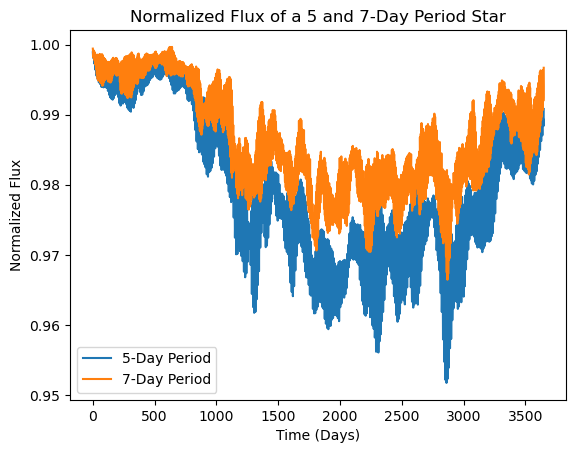

In [45]:
plt.plot(star1['time'], star1['flux'], label = '5-Day Period')
plt.plot(star2['time'], star2['flux'], label = '7-Day Period')
plt.xlabel('Time (Days)')
plt.ylabel('Normalized Flux')
plt.title('Normalized Flux of a 5 and 7-Day Period Star')
plt.legend()

### Scale the Fluxes Based on Temperature and Plot Light Curve

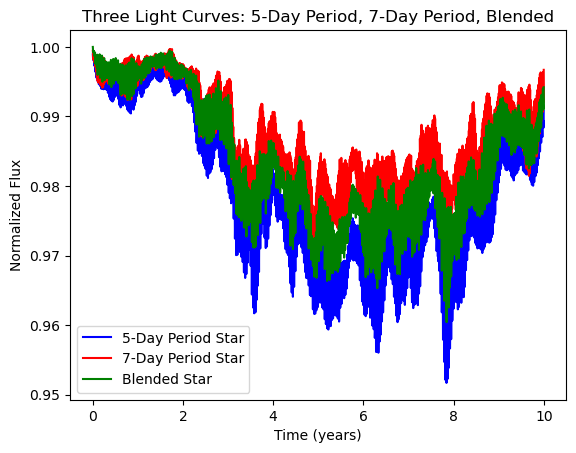

In [46]:
def ScalingComp(star1, star2):
    global TotalFlux
    global StarFlux1
    global StarFlux2
    
    T1 = 5800
    T2 = 5400
    F1 = (T1/T2)**4
    
    StarFlux1 = star1['flux'] * F1
    StarFlux2 = star2['flux'] 
    
    TotalFlux = StarFlux1 + StarFlux2
    TotalFlux = TotalFlux/max(TotalFlux)
    
    plt.plot(star1['time']/365, star1['flux'], color = 'Blue', label = '5-Day Period Star')
    plt.plot(star2['time']/365, star2['flux'], color = 'Red', label = '7-Day Period Star')
    plt.plot(np.arange(0, 10*365, 1)/365, TotalFlux, color = 'Green', label = 'Blended Star')
    plt.xlabel('Time (years)')
    plt.ylabel('Normalized Flux')
    plt.title('Three Light Curves: 5-Day Period, 7-Day Period, Blended')
    plt.legend()
    plt.savefig('Three Light Curves')
    
    
ScalingComp(star1, star2)

### Create Power vs Frequency Spectra of Individual Stars and Blended Stars

In [47]:
#Get time of first 50 days of light curve
time_short = np.arange(0, 365, 1)

#Create the Lomb-Scargle power distribution
frequencyTotal, powerTotal = LombScargle(time_short, TotalFlux[0:365]).autopower()
frequency1, power1 = LombScargle(time_short, StarFlux1[0:365]).autopower()
frequency2, power2 = LombScargle(time_short, StarFlux2[0:365]).autopower()

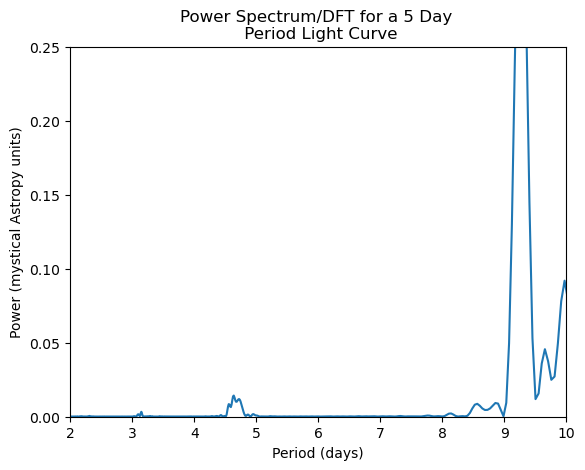

In [48]:
plt.plot(1/frequency1, power1)
plt.xlim(2, 10) #Due to the Nyquist Frequency
plt.ylim(-.0001, .25)
plt.xlabel('Period (days)')
plt.ylabel('Power (mystical Astropy units)')
plt.title('Power Spectrum/DFT for a 9 Day \n Period Light Curve')
plt.savefig('5-Day Period Light Curve Power Spectrum')
plt.show()

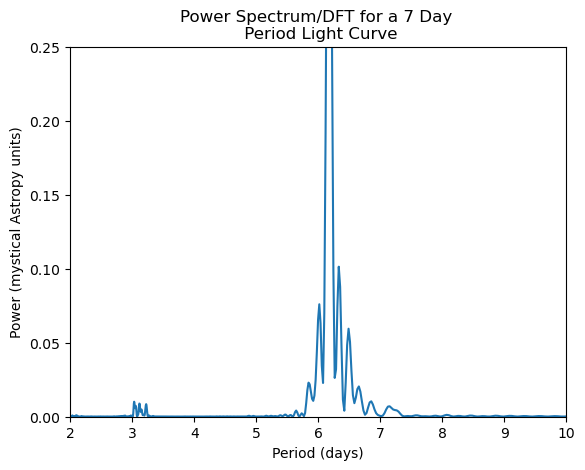

In [49]:
plt.plot(1/frequency2, power2)
plt.xlim(2, 10) #Due to the Nyquist Frequency
plt.ylim(-.0001, .25)
plt.xlabel('Period (days)')
plt.ylabel('Power (mystical Astropy units)')
plt.title('Power Spectrum/DFT for a 6 Day \n Period Light Curve')
plt.savefig('7-Day Period Light Curve Power Spectrum')
plt.show()

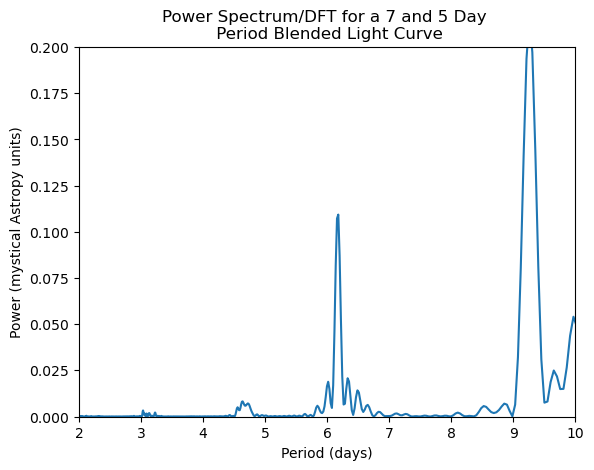

In [50]:
plt.plot(1/frequencyTotal, powerTotal)
plt.xlim(2, 10) #Due to the Nyquist Frequency
plt.ylim(-.0001, .2)
plt.xlabel('Period (days)')
plt.ylabel('Power (mystical Astropy units)')
plt.title('Power Spectrum/DFT for a 7 and 5 Day \n Period Blended Light Curve')
plt.savefig('Blended Light Curve Power Spectrum')
plt.show()

### Create Animations for Both Individual Stars

MovieWriter imagemagick unavailable; using Pillow instead.


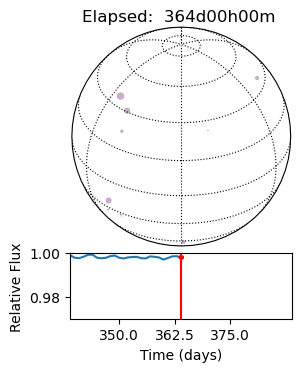

In [21]:
ani = spots1.ortho_animation(time[0:365], star1[0:365], interval=200, fig_kw=dict(figsize=(3, 3.6)));
ani.save("star1.gif", writer="imagemagick", dpi=200, fps=5)

MovieWriter imagemagick unavailable; using Pillow instead.


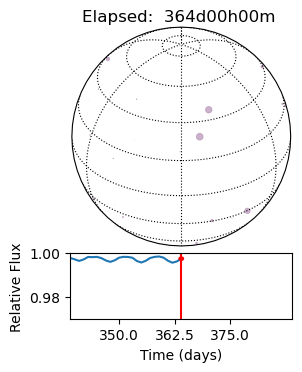

In [22]:
ani = spots2.ortho_animation(time[0:365], star2[0:365], interval=200, fig_kw=dict(figsize=(3, 3.6)));
ani.save("star2.gif", writer="imagemagick", dpi=200, fps=5)

In [61]:
periods = [3, 5, 7, 9, 11]
all_stars = []

star = bp.regions(
    butterfly = True, 
    activity_rate = 1, 
    cycle_length = 10, 
    cycle_overlap = 2, 
    decay_time =(10),
    max_ave_lat = 45, 
    min_ave_lat = 20,
    alpha_med = (3*3e-4),
    tsim = 365*10
    )

i = 1
for p in periods:
    
    globals()[f'spots{i}'] = bp.Spots(
    star, 
    alpha_med = (3*3e-4), 
    period = p,
    incl = 1, 
    decay_timescale = 10, 
    diffrot_shear = 0.25
    )
    
    time = np.arange(0, 365*10, 1)
    if i == 1:
        flux = 1 + spots1.calc(time)
    elif i == 2:
        flux = 1 + spots2.calc(time)
    elif i == 3:
        flux = 1 + spots3.calc(time)
    elif i == 4:
        flux = 1 + spots4.calc(time)
    elif i == 5:
        flux = 1 + spots5.calc(time)
    elif i == 6:
        flux = 1 + spots6.calc(time)
    elif i == 7:
        flux = 1 + spots7.calc(time)
    elif i == 8:
        flux = 1 + spots8.calc(time)


    all_stars.append(pd.DataFrame(np.c_[time, flux], columns=['time', 'flux']))
    
    
    print(f'star {i}')
    i += 1

star 1
star 2
star 3
star 4
star 5


[3200. 3820. 4440. 5060. 5680. 6300.]
1


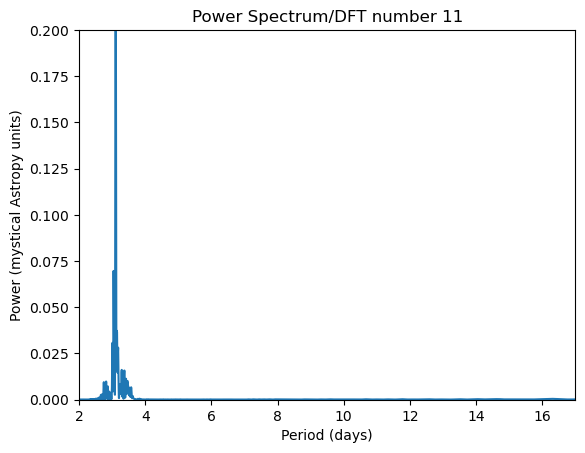

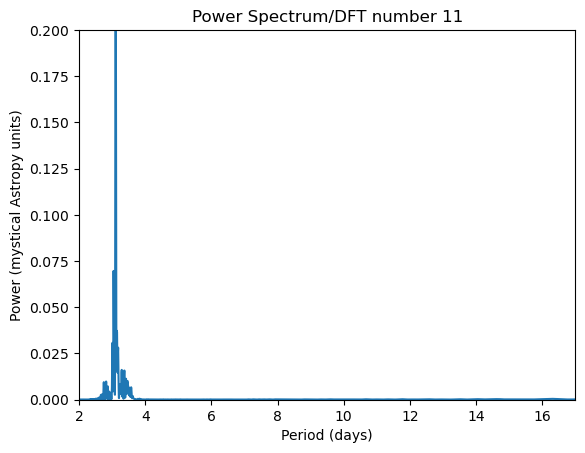

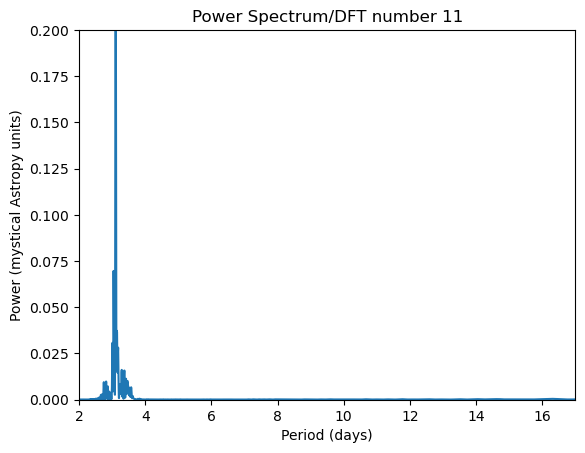

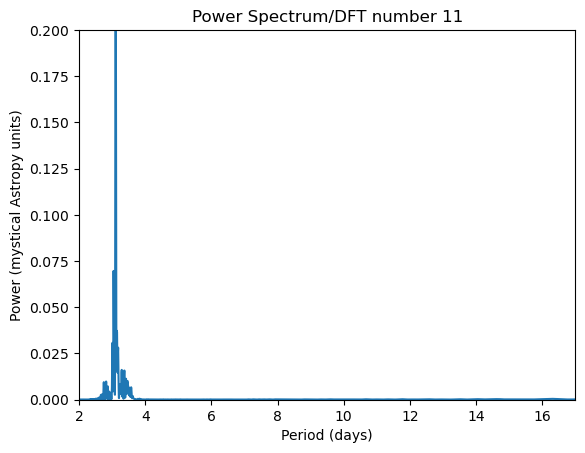

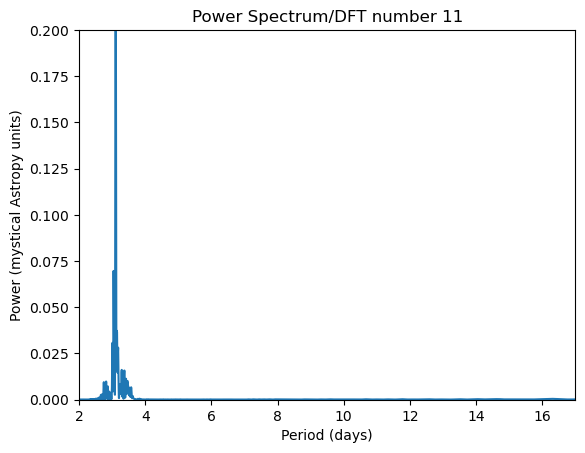

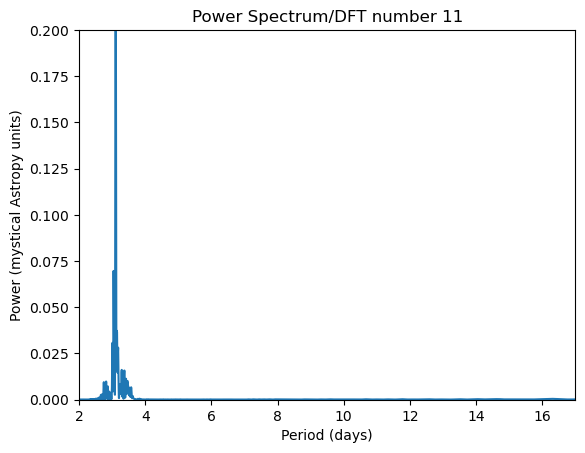

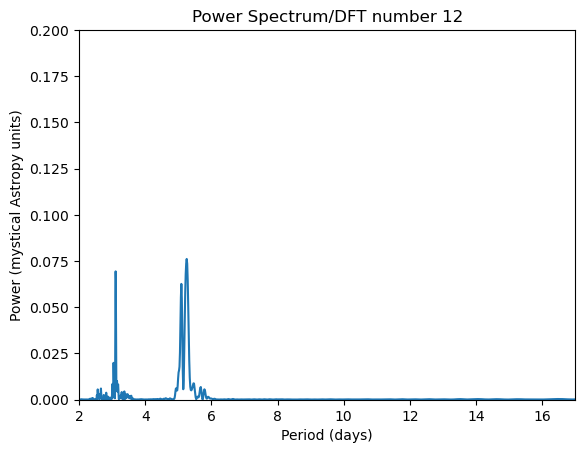

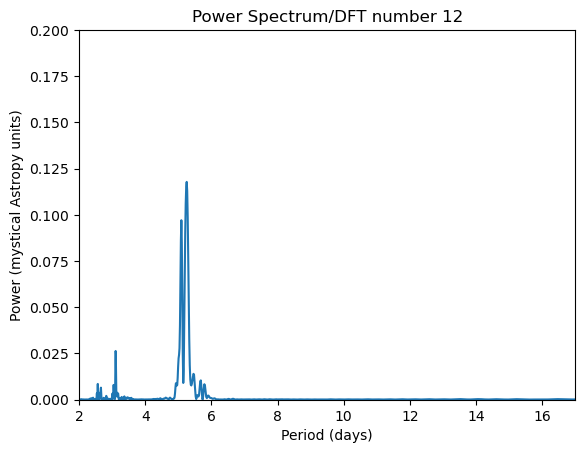

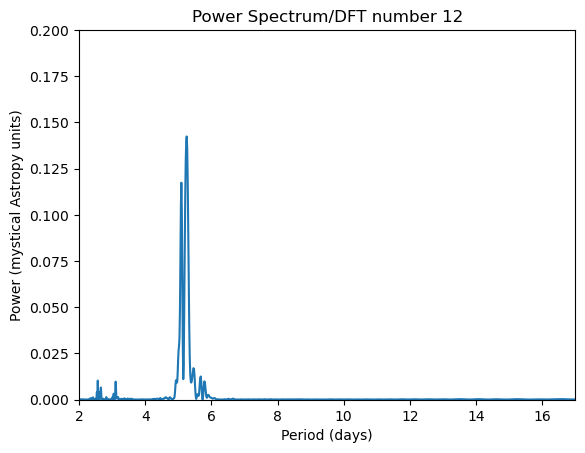

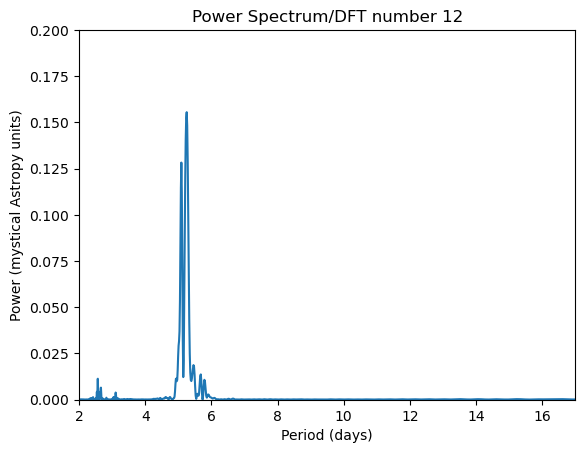

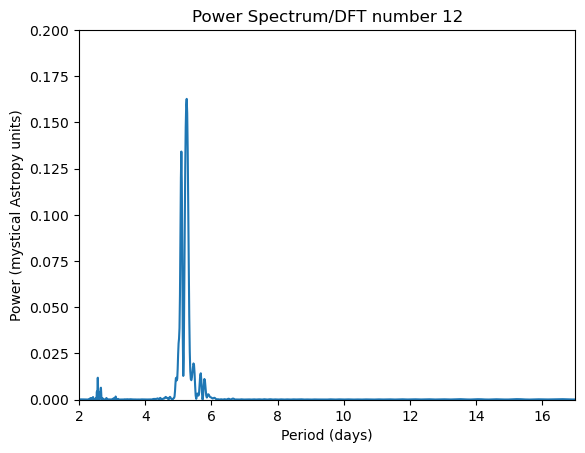

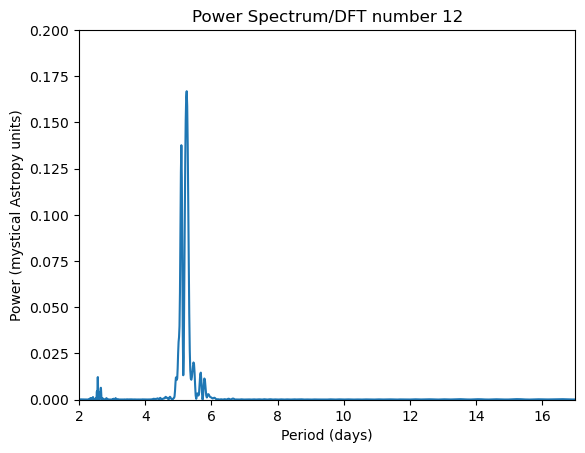

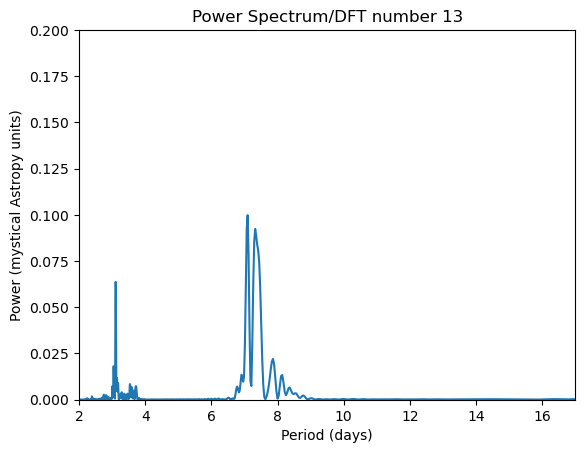

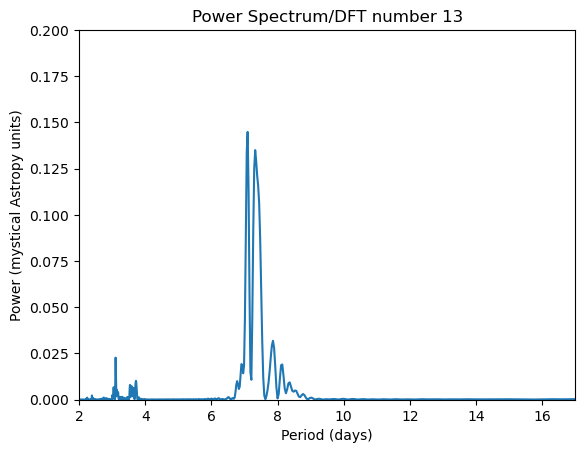

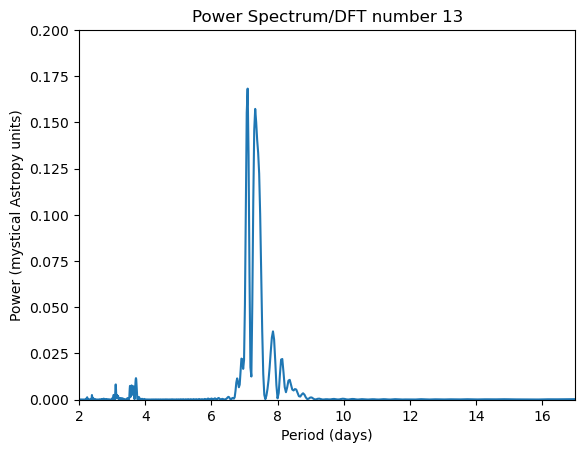

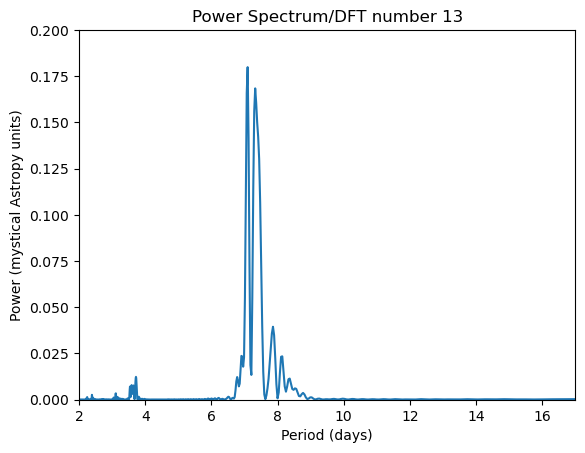

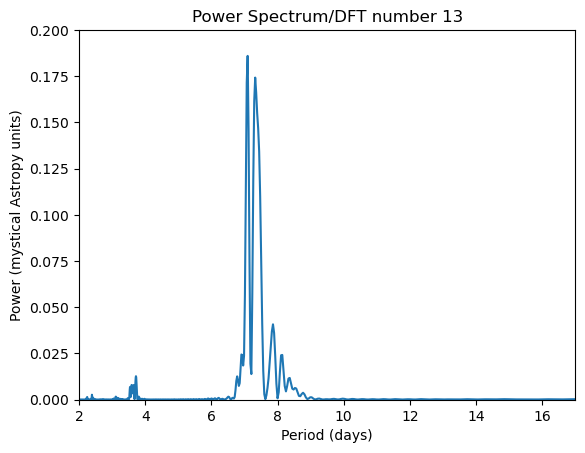

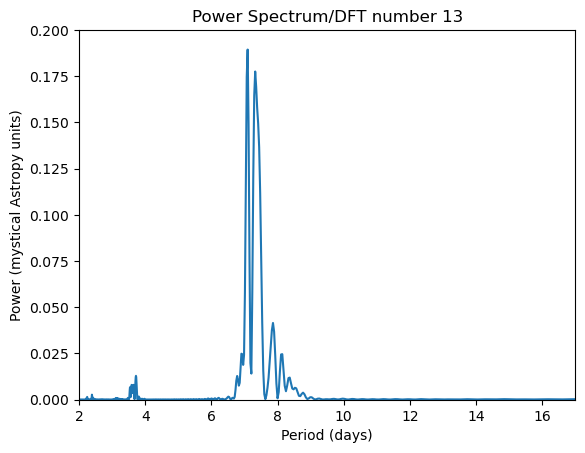

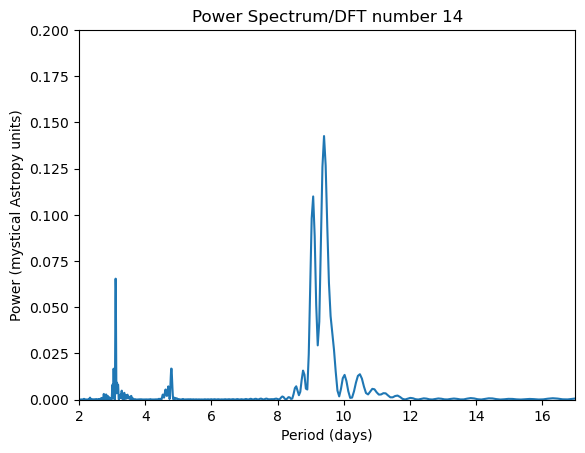

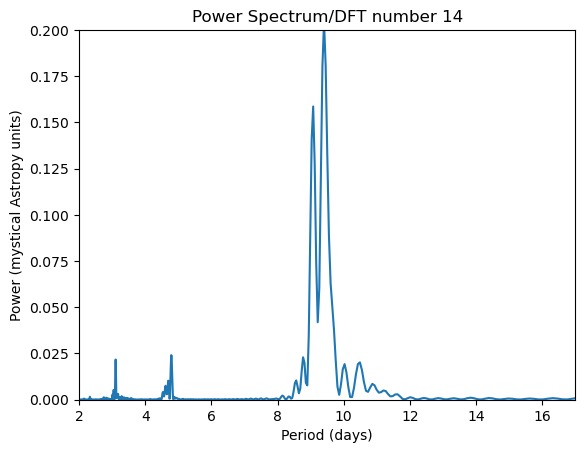

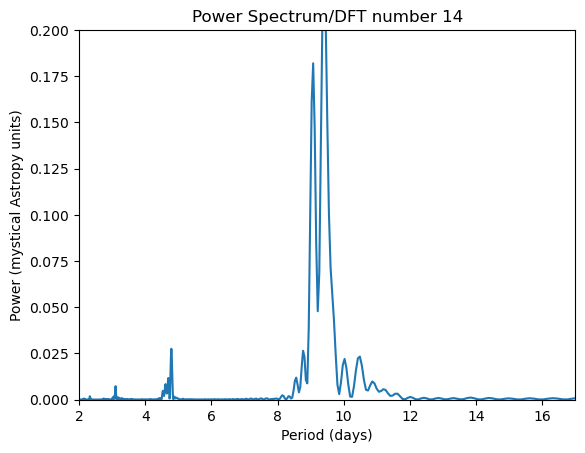

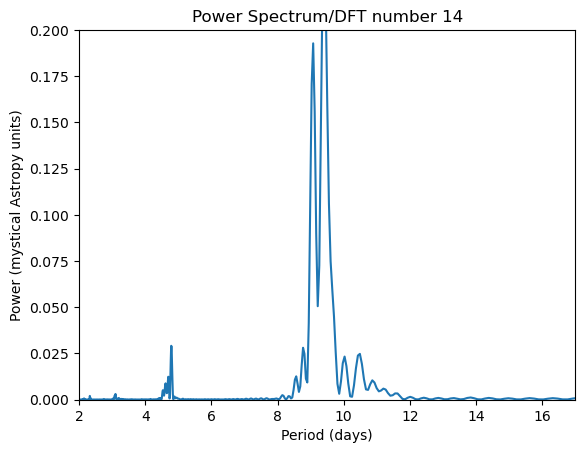

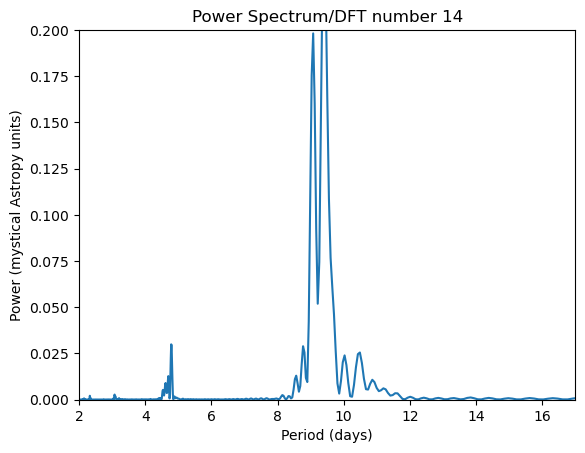

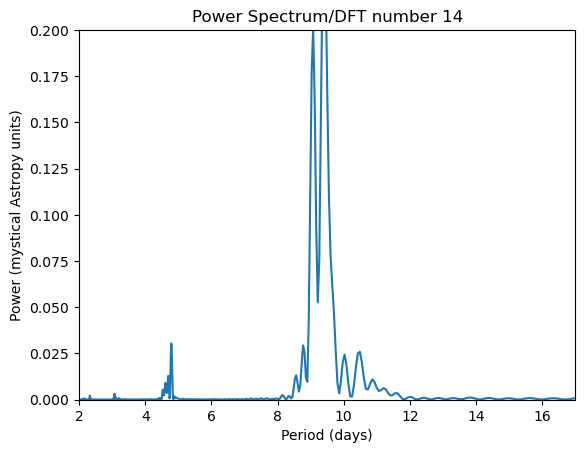

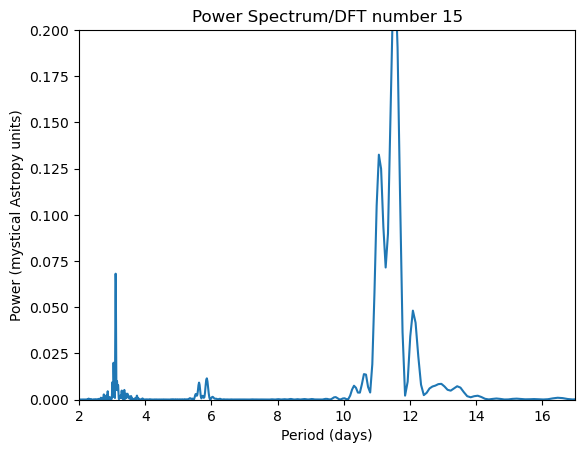

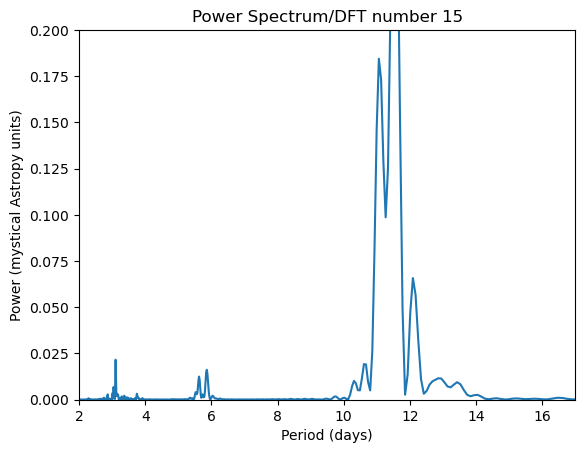

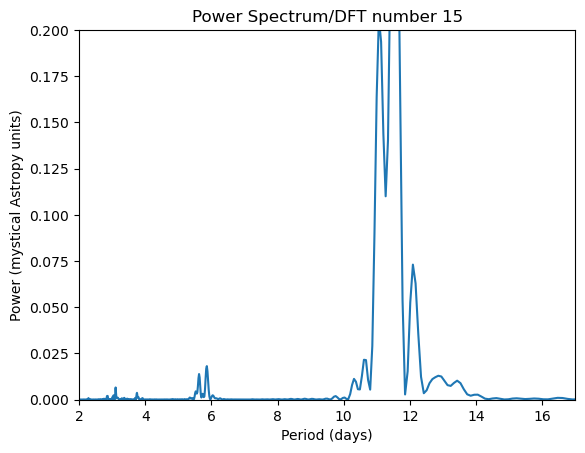

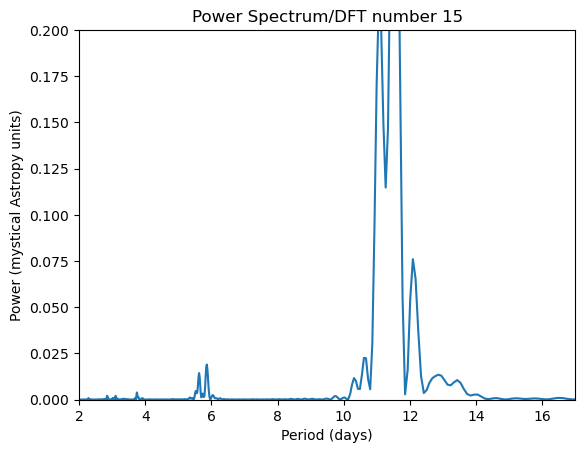

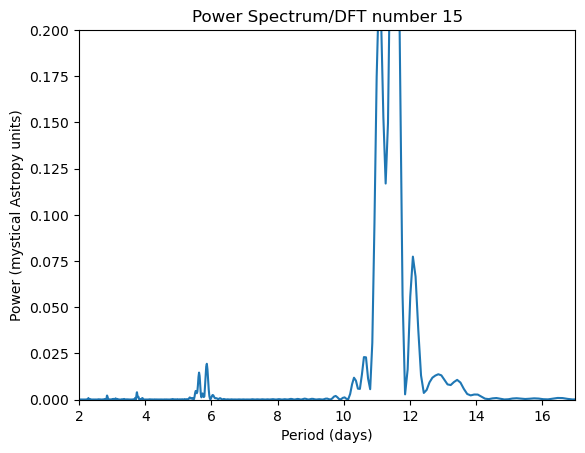

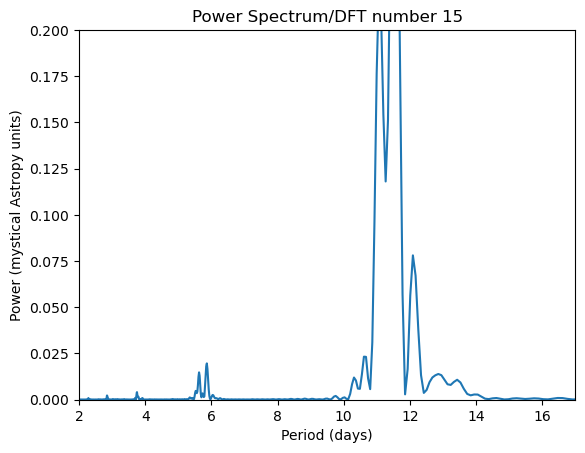

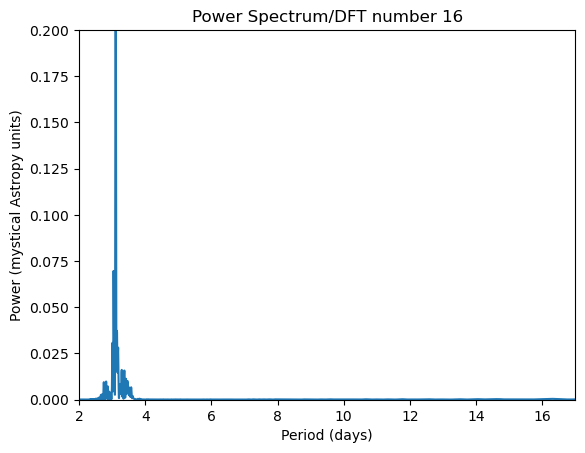

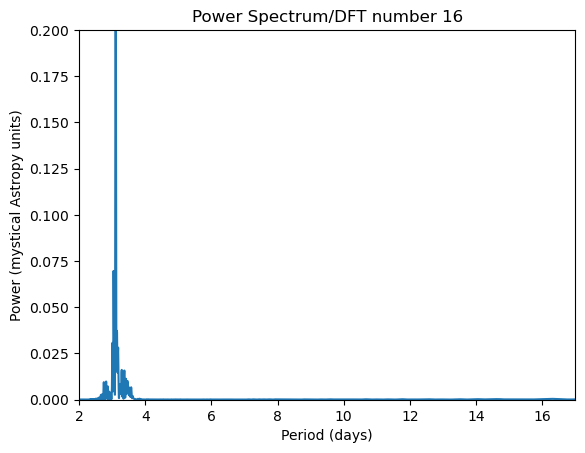

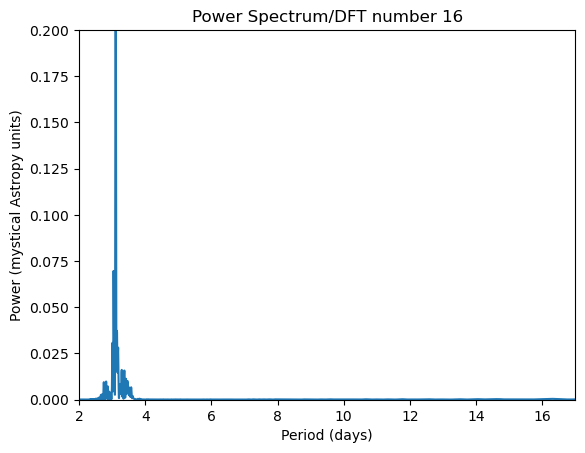

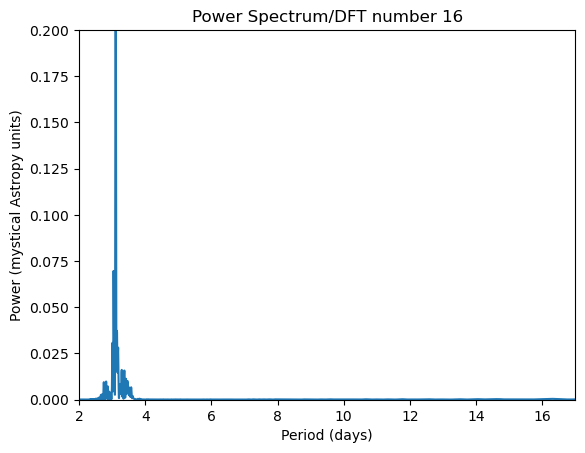

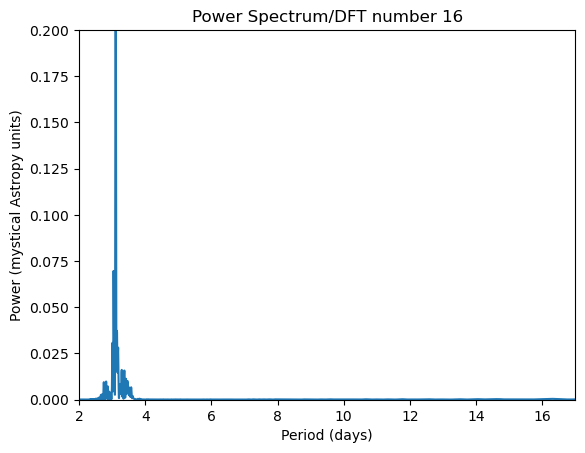

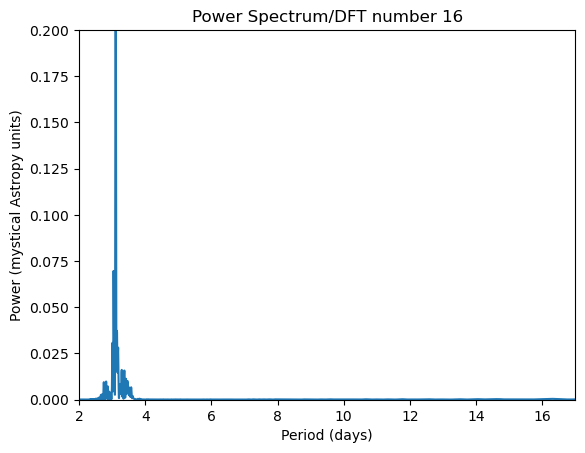

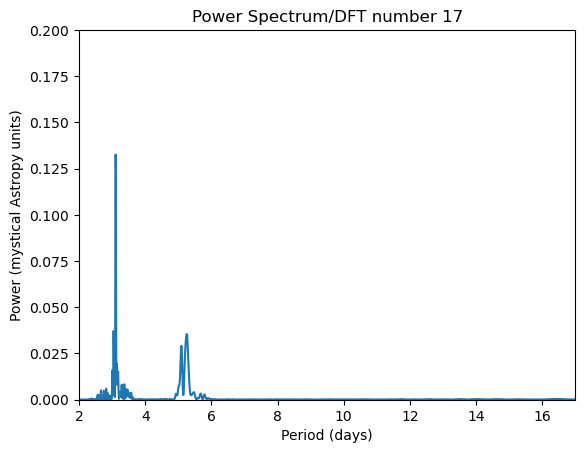

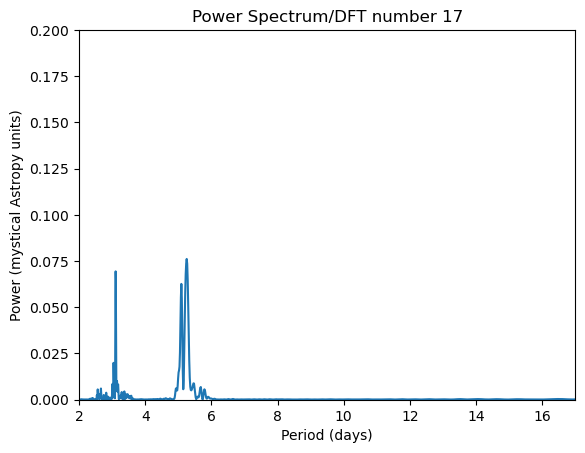

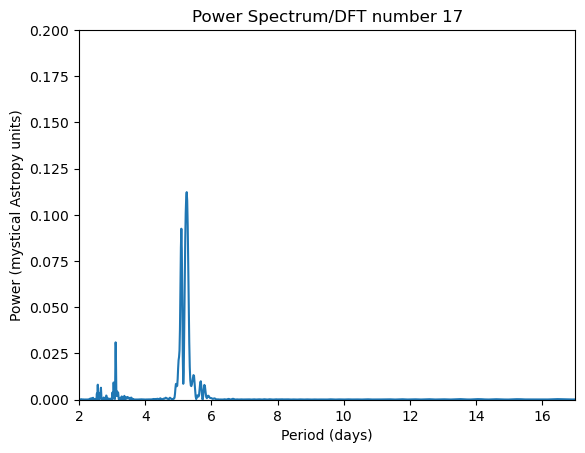

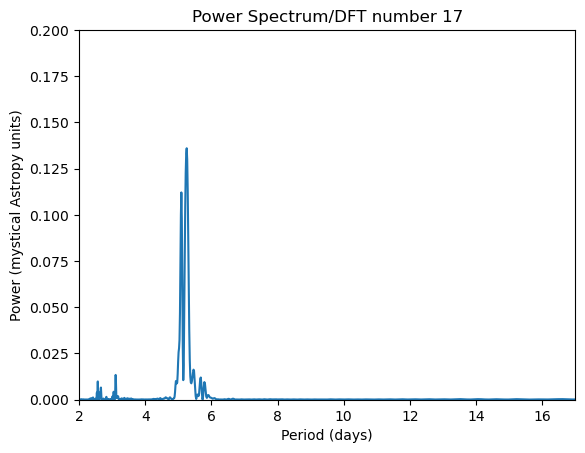

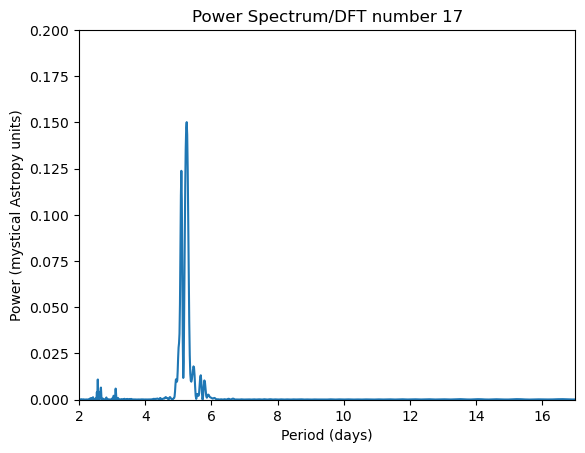

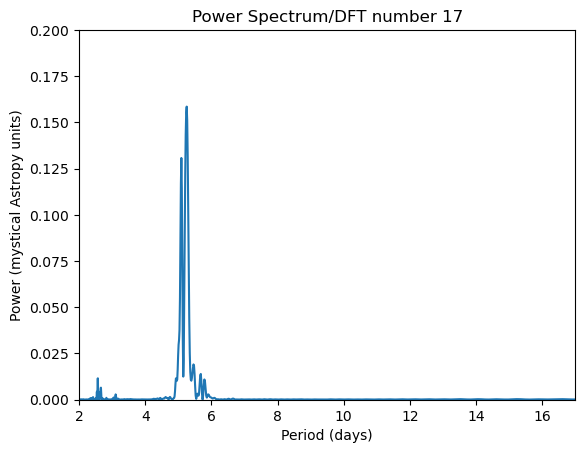

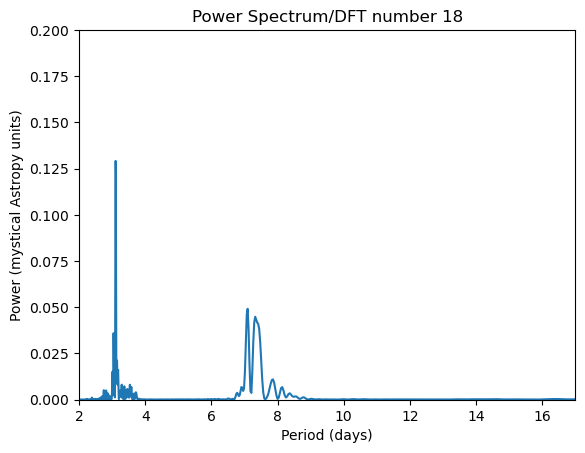

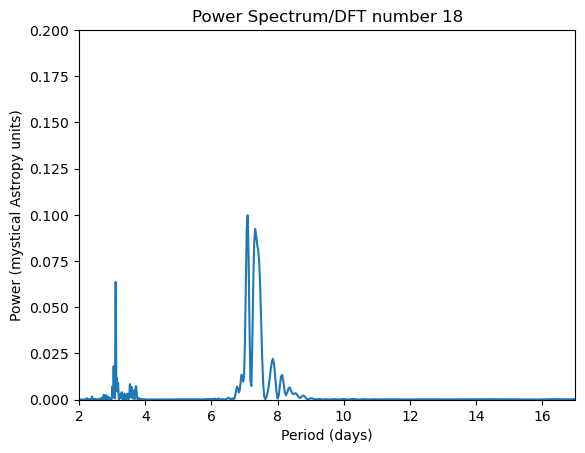

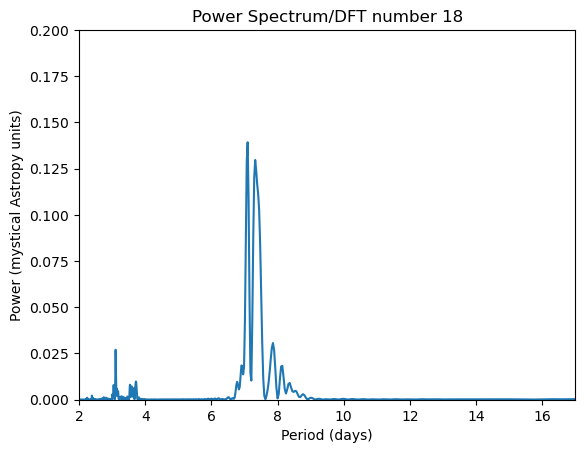

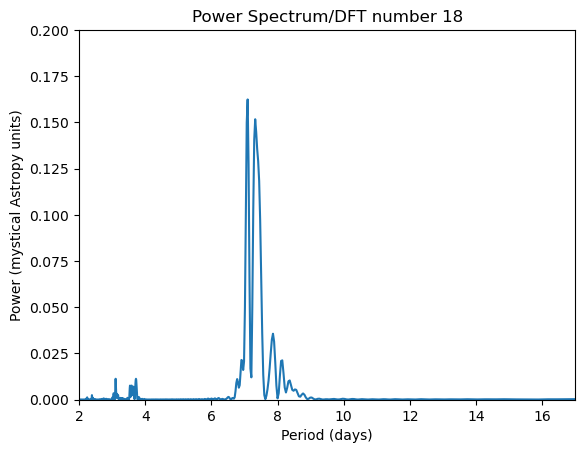

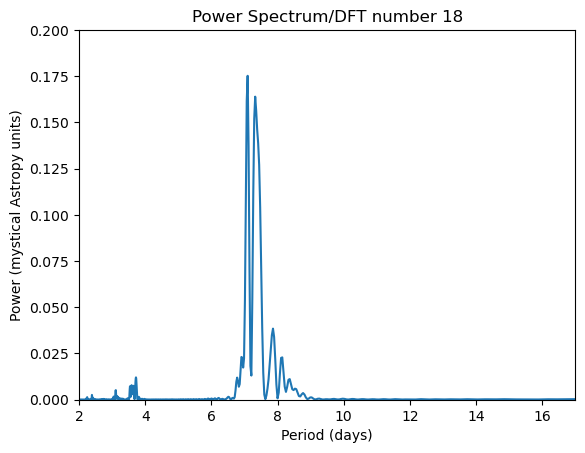

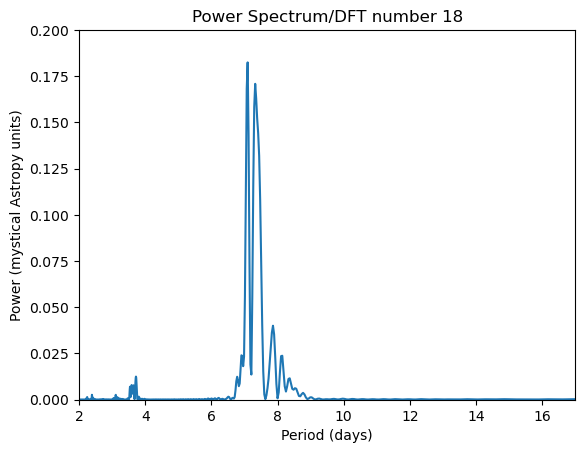

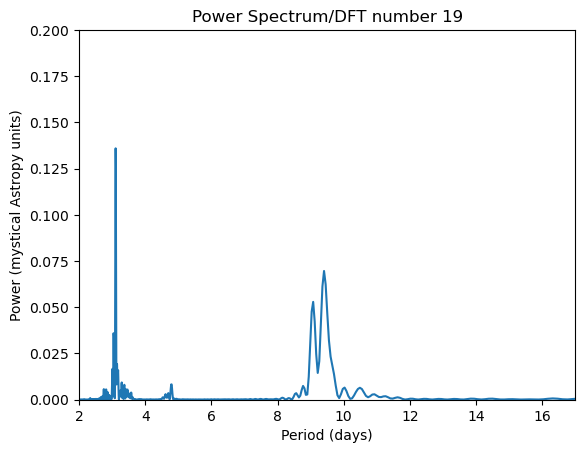

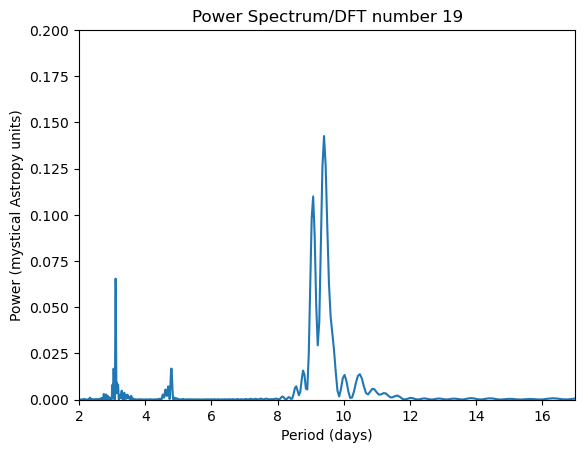

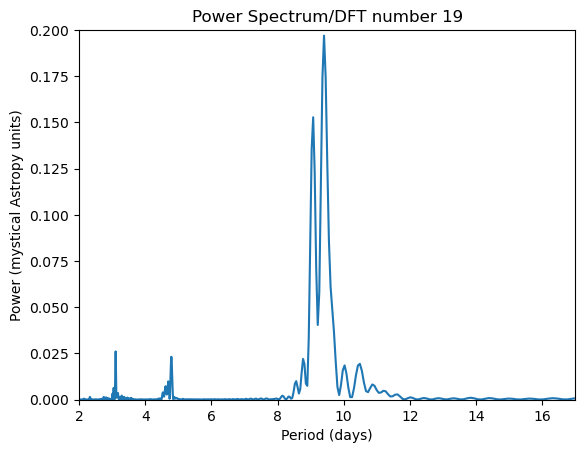

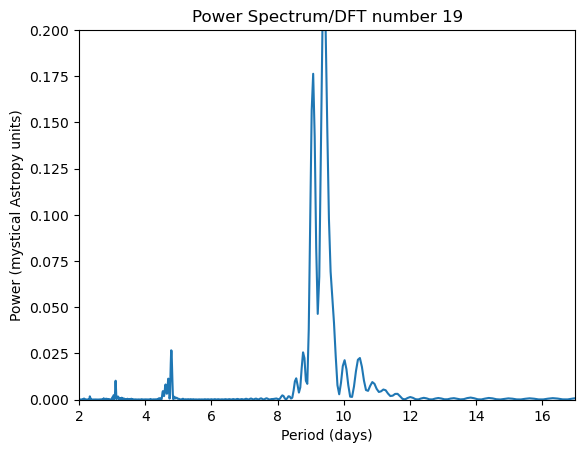

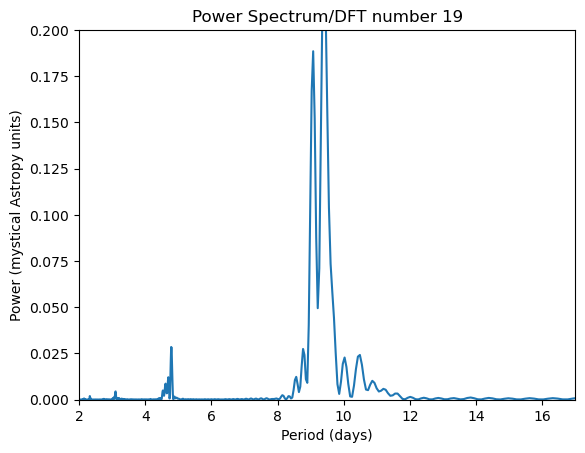

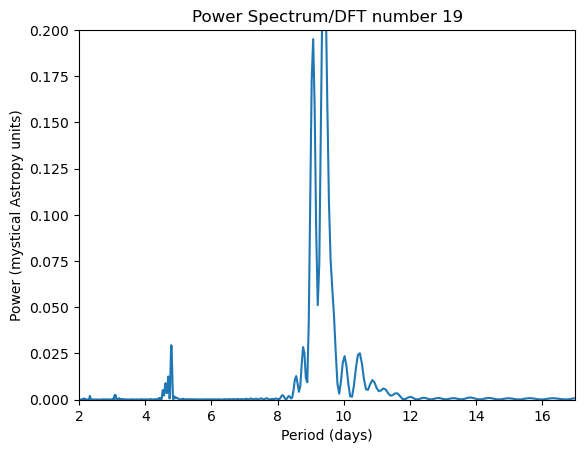

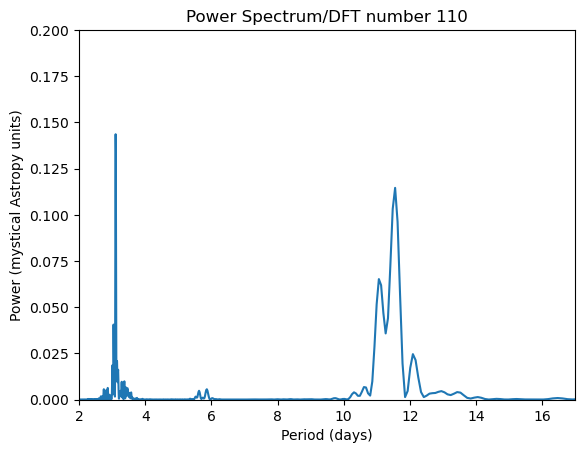

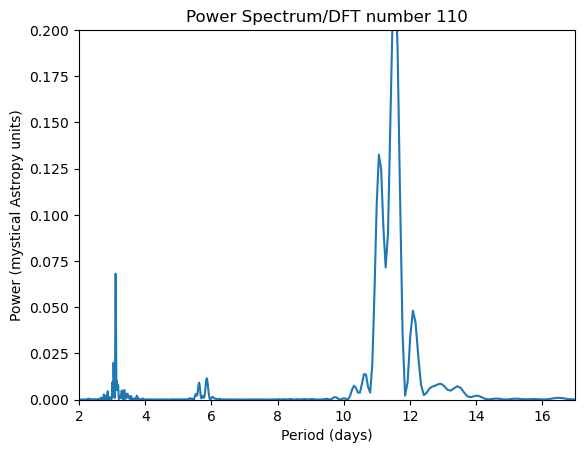

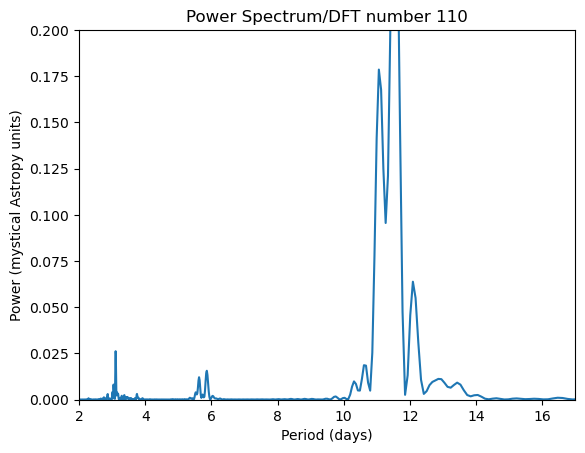

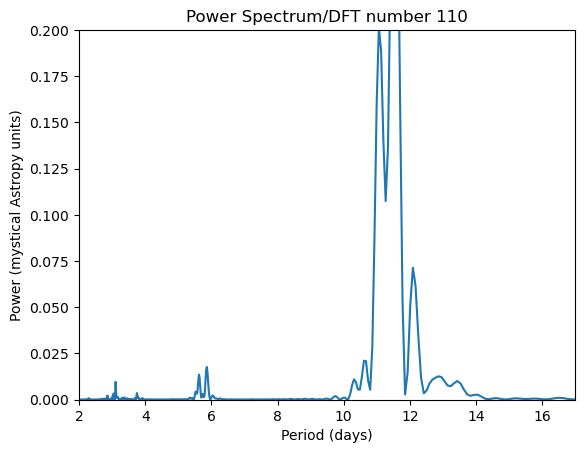

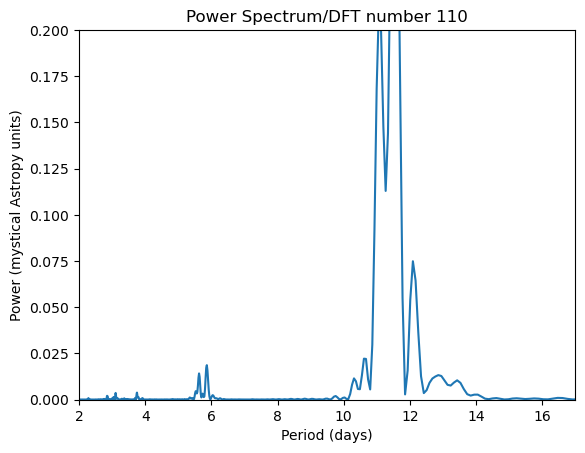

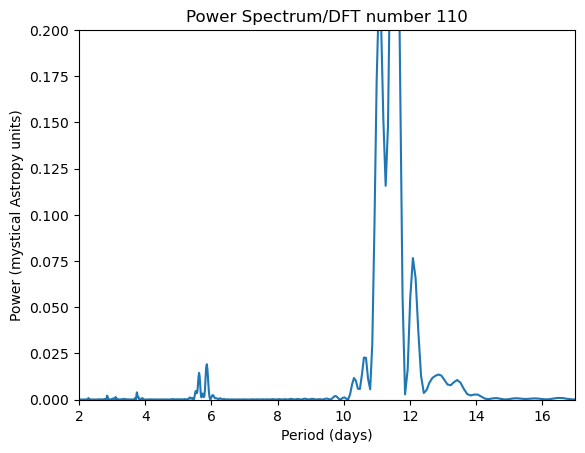

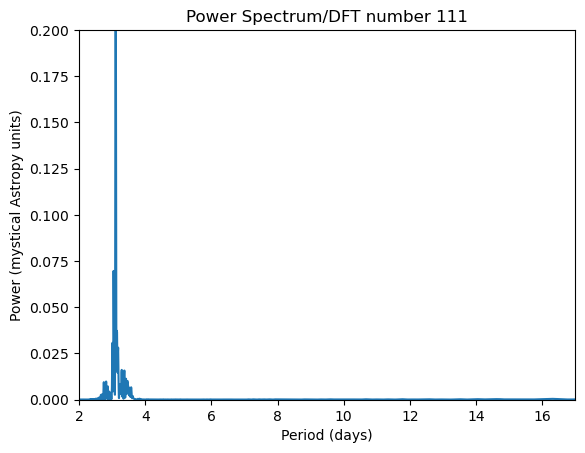

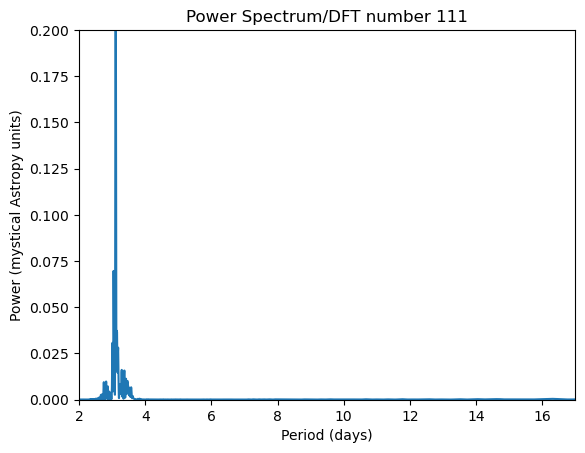

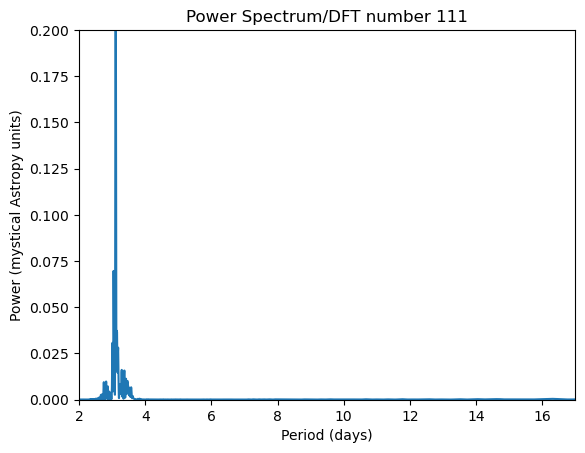

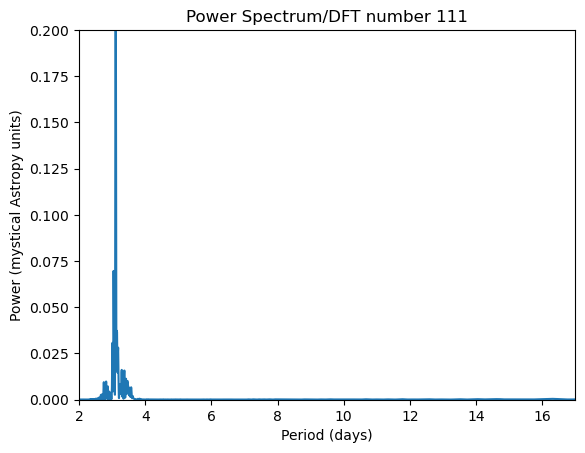

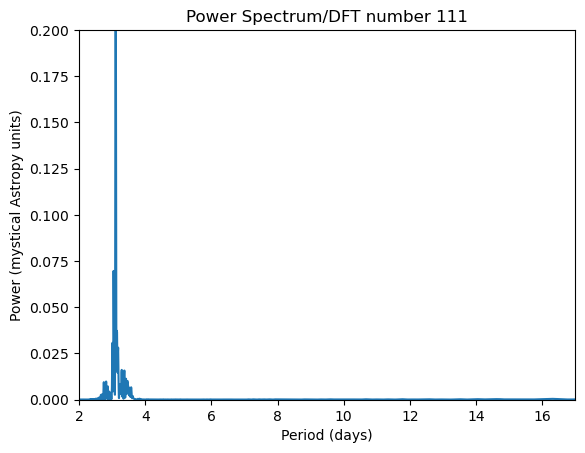

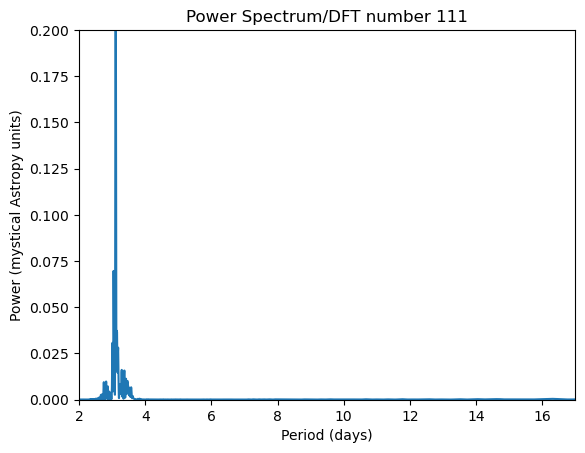

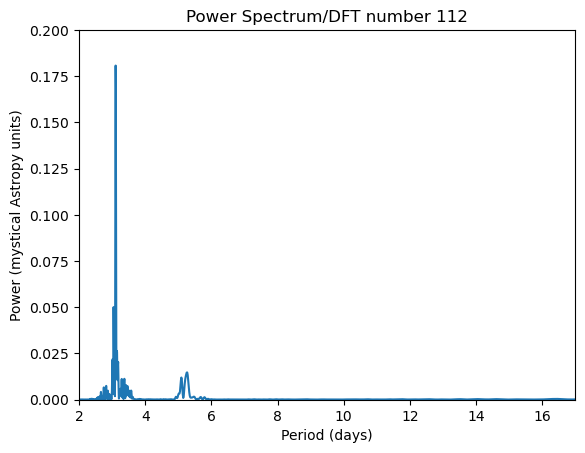

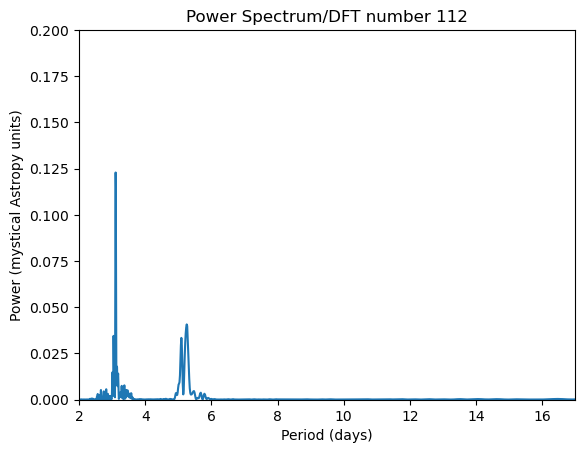

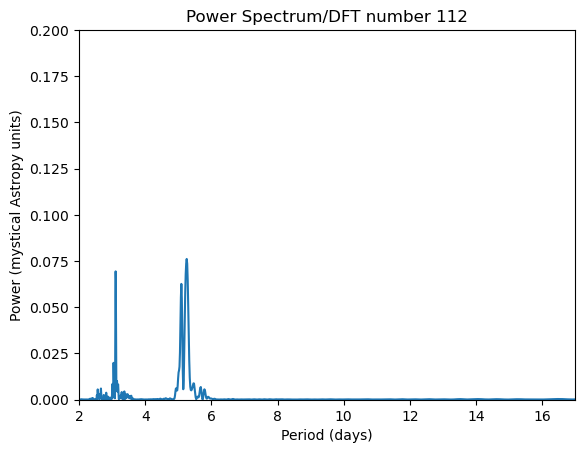

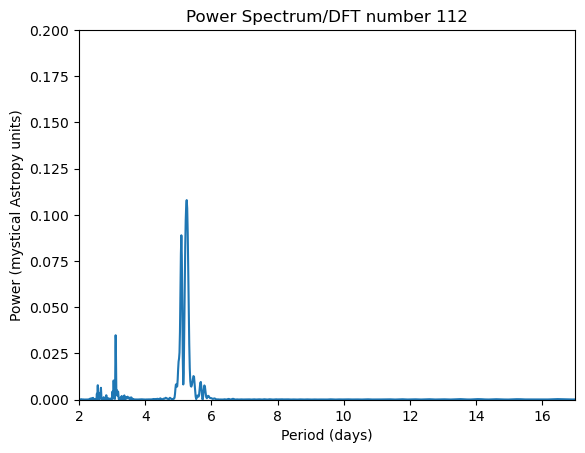

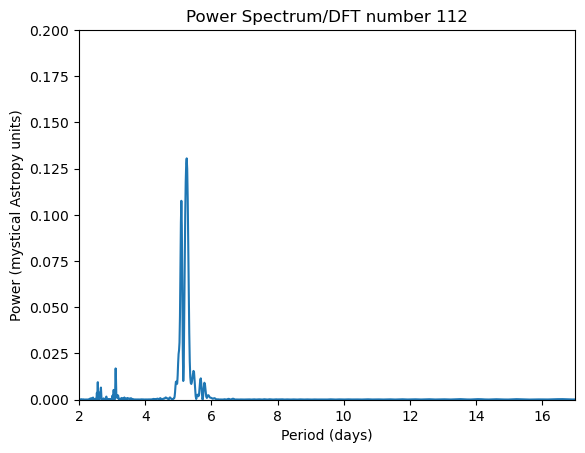

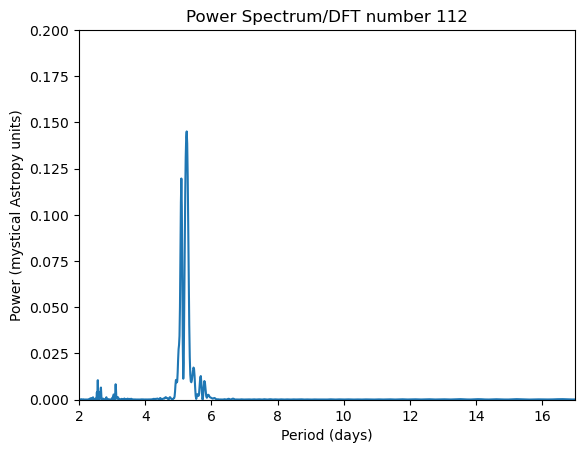

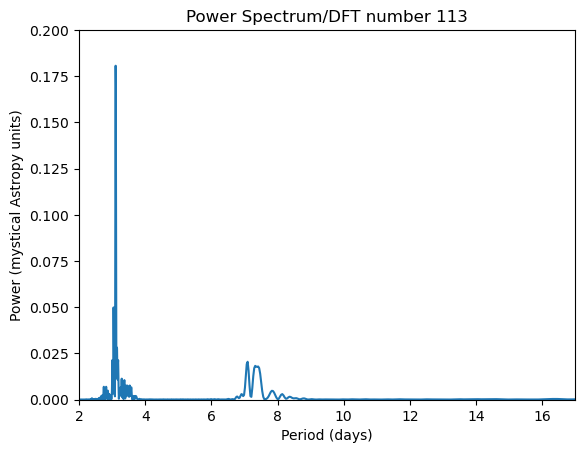

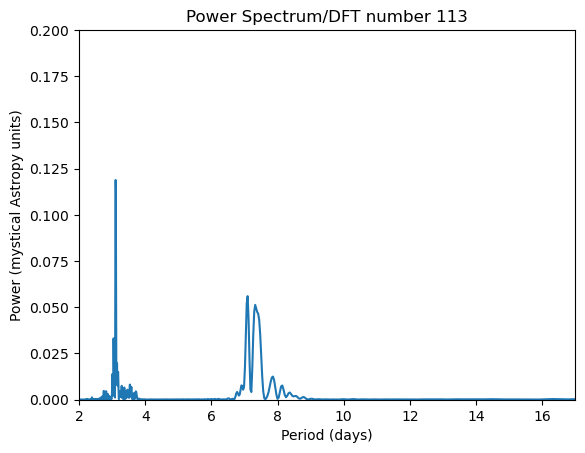

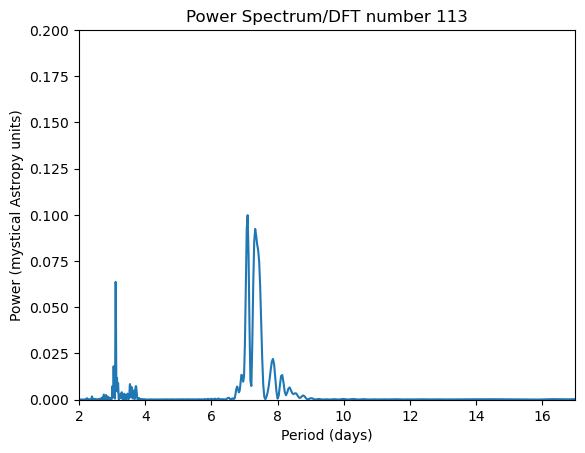

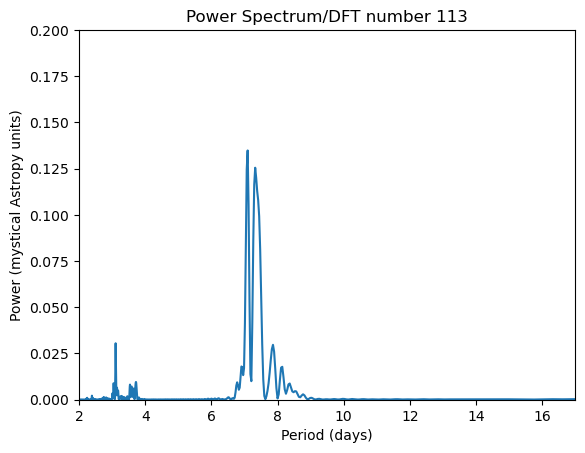

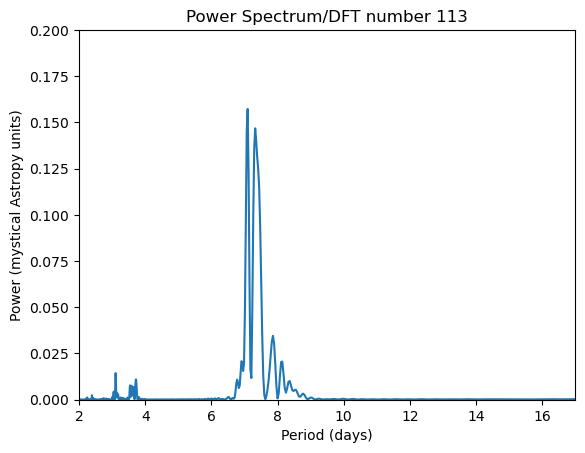

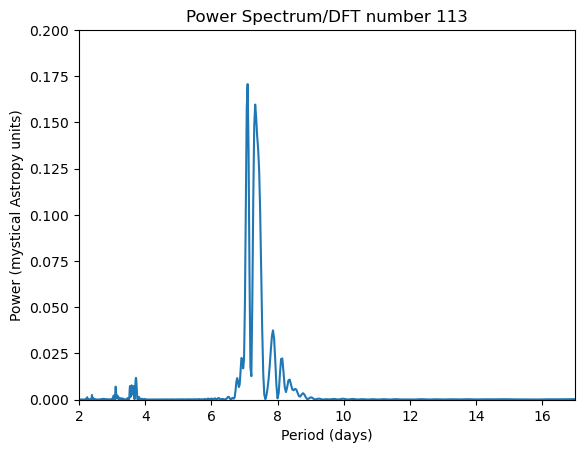

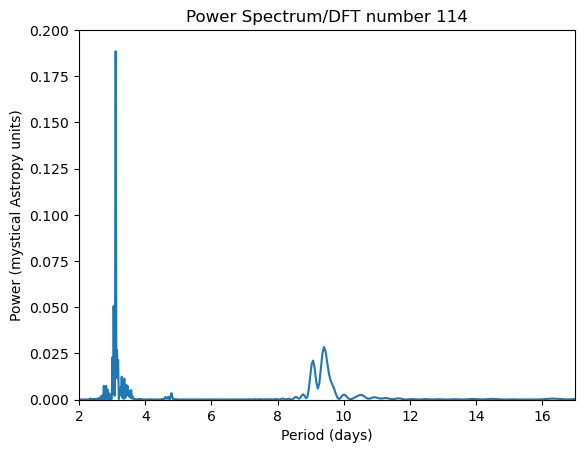

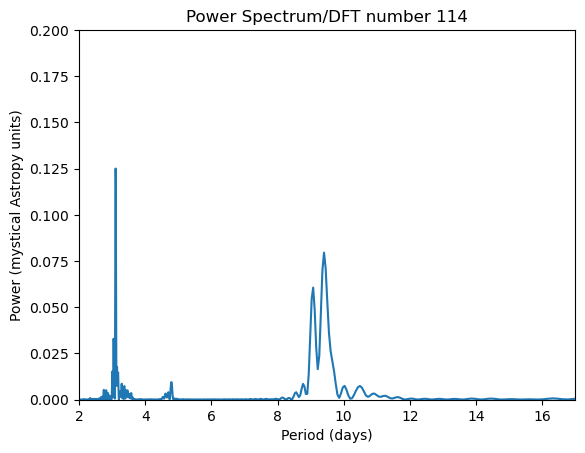

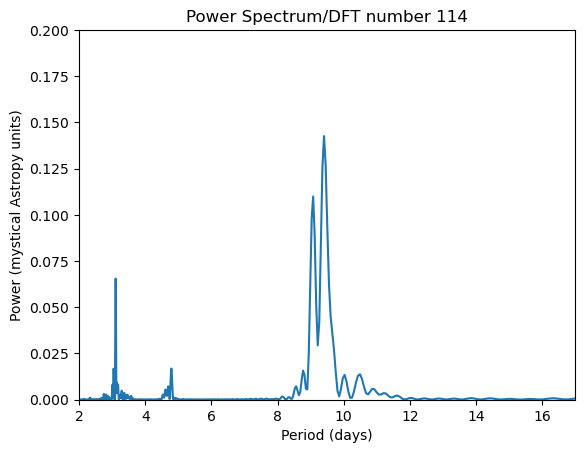

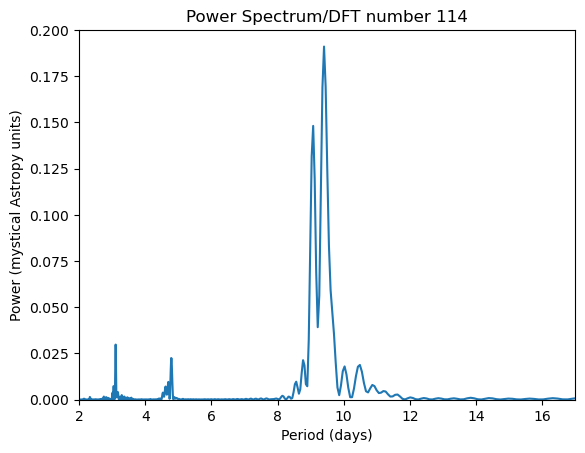

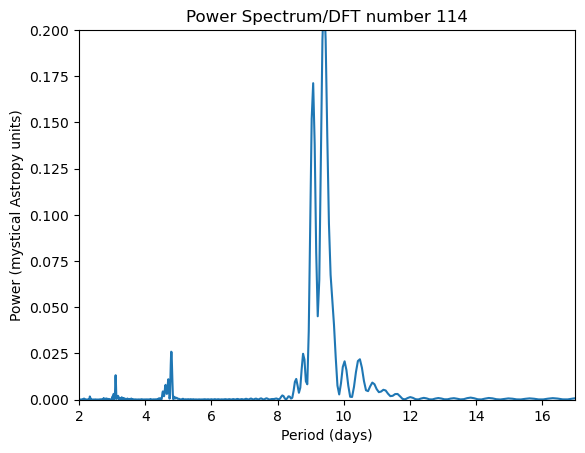

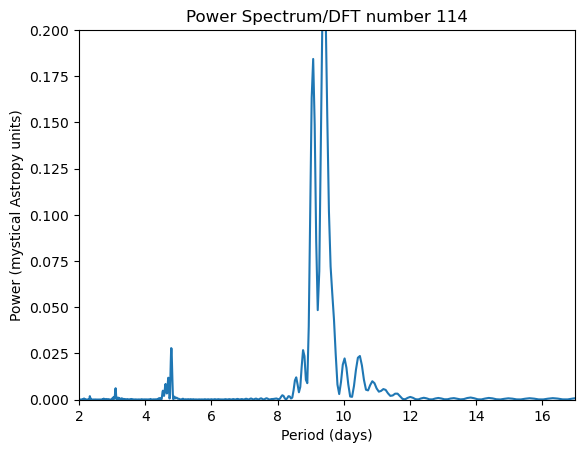

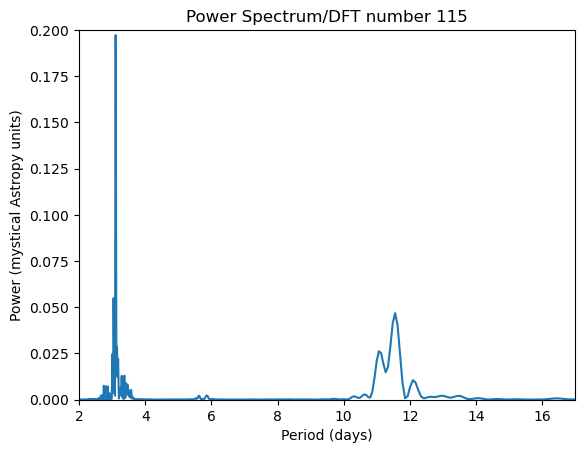

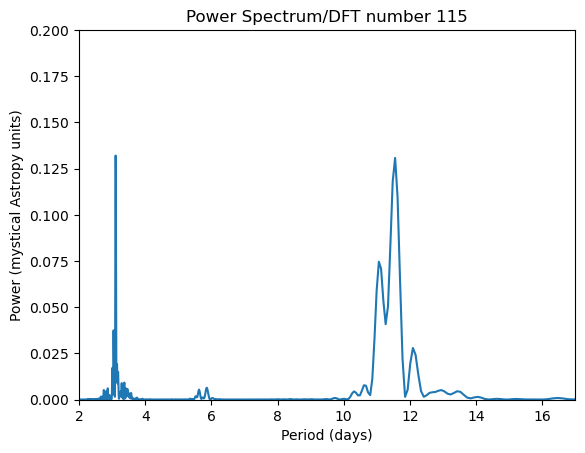

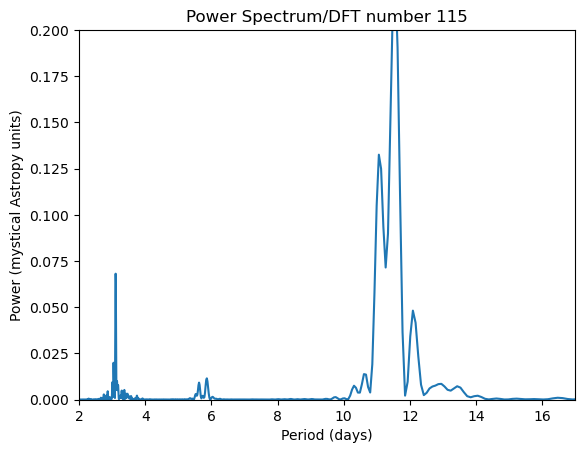

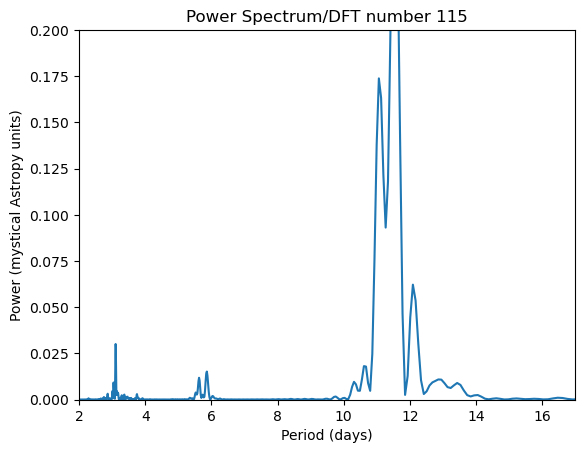

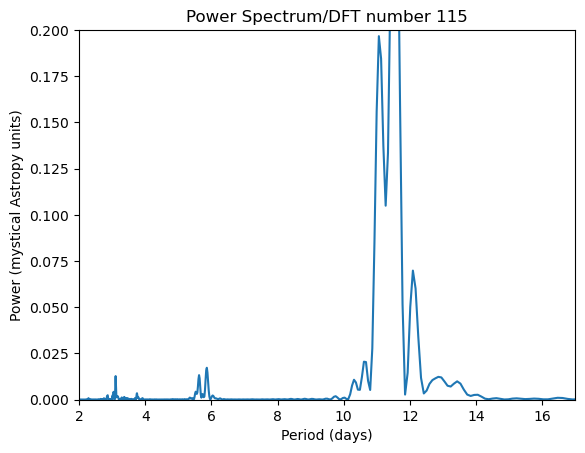

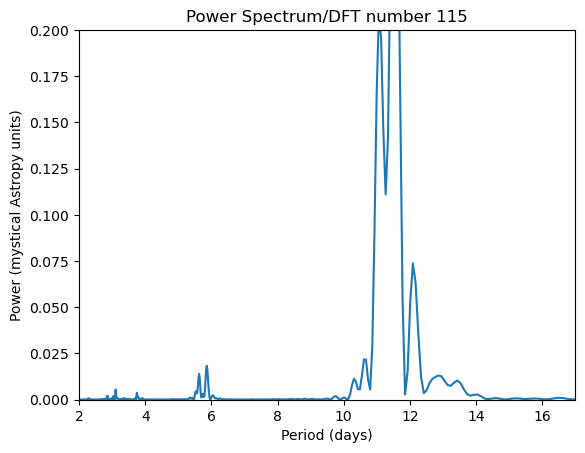

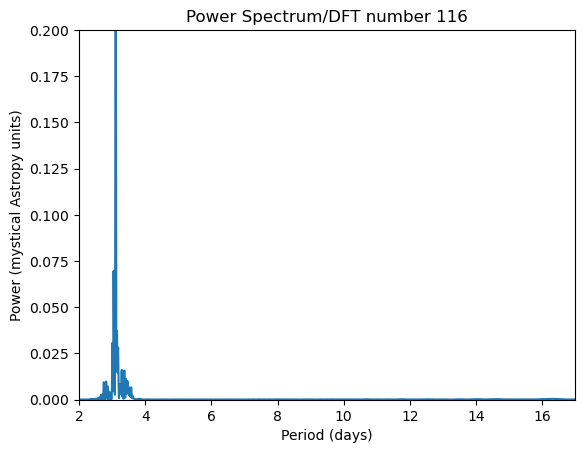

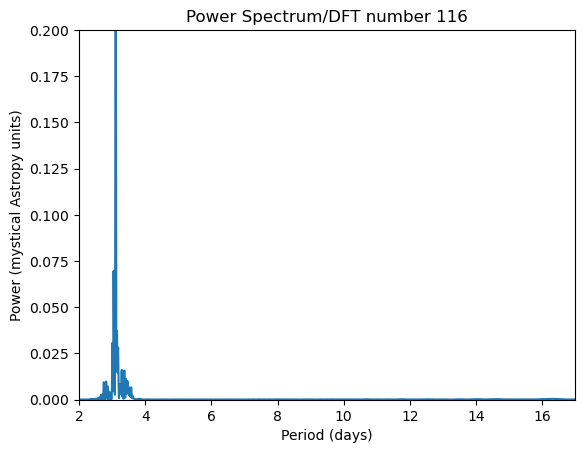

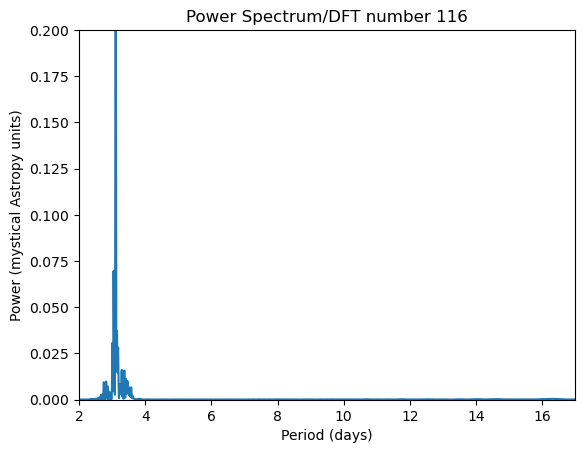

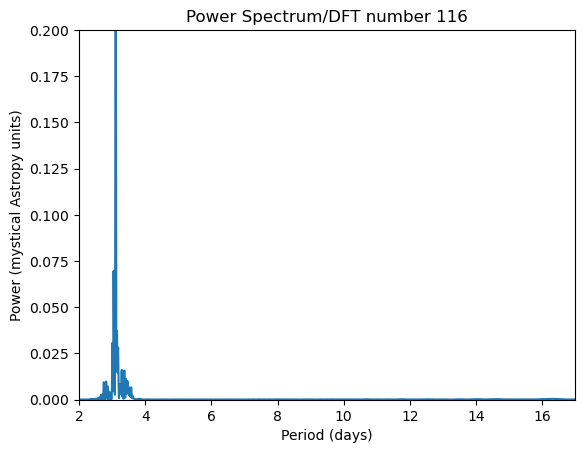

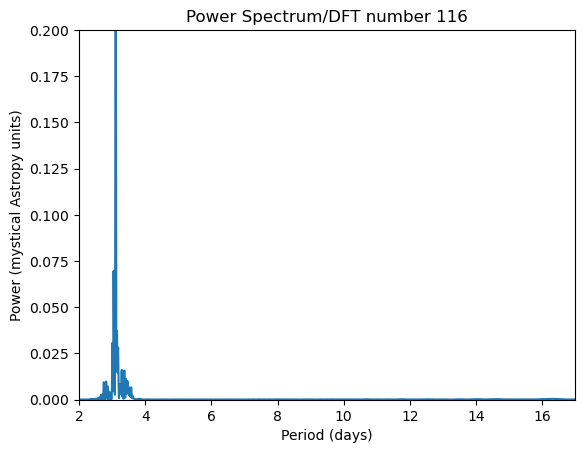

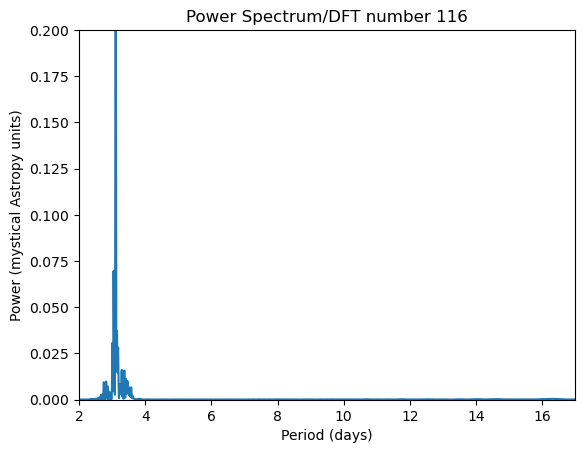

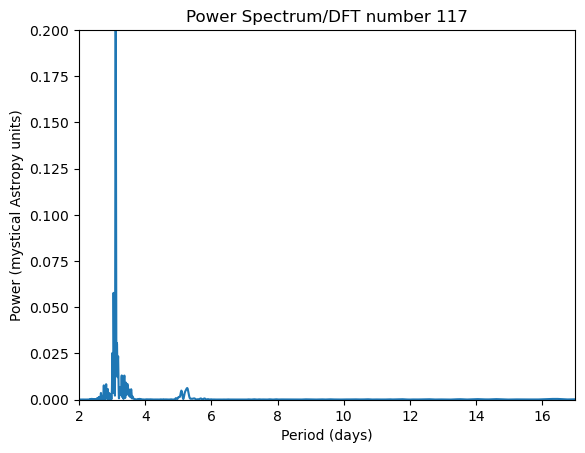

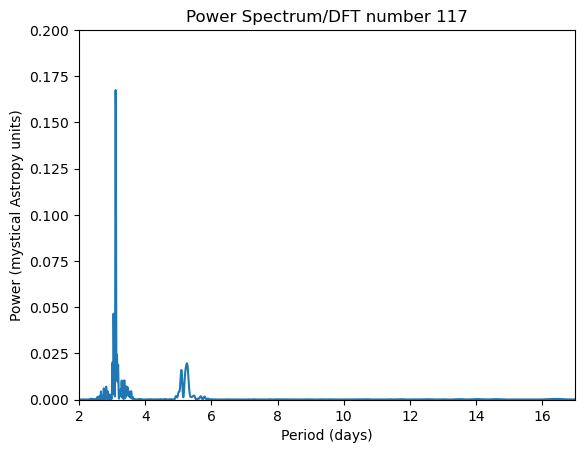

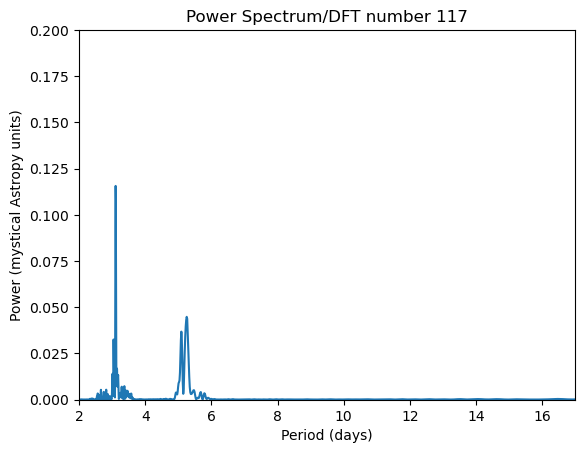

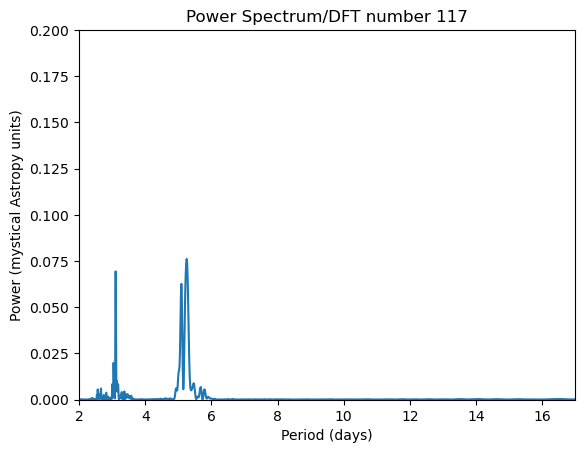

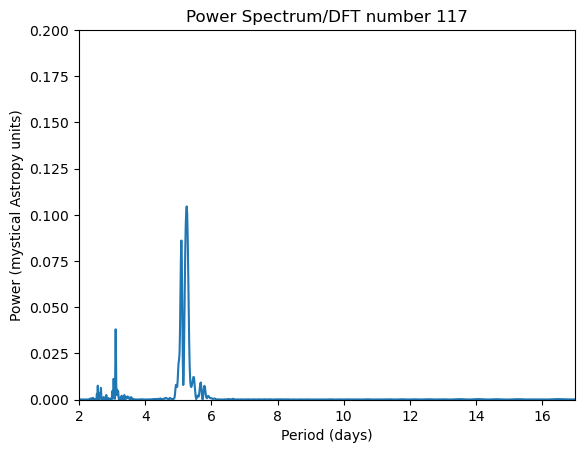

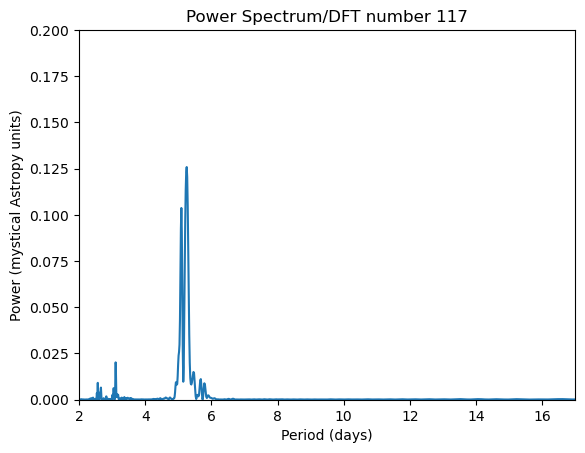

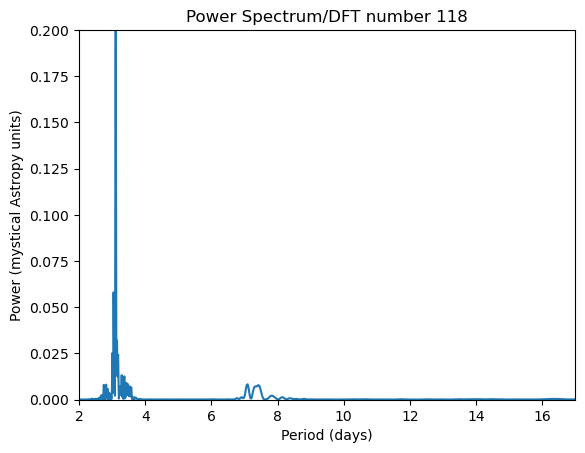

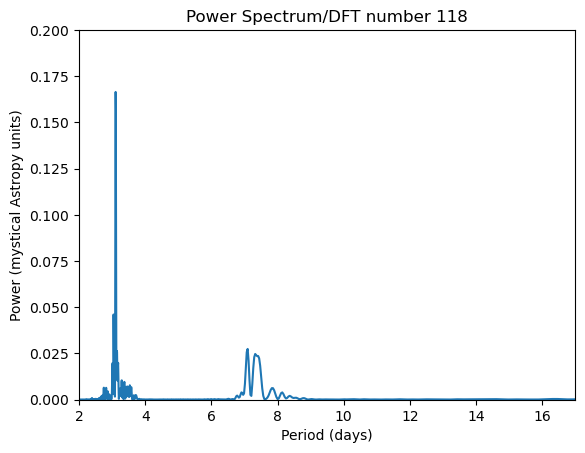

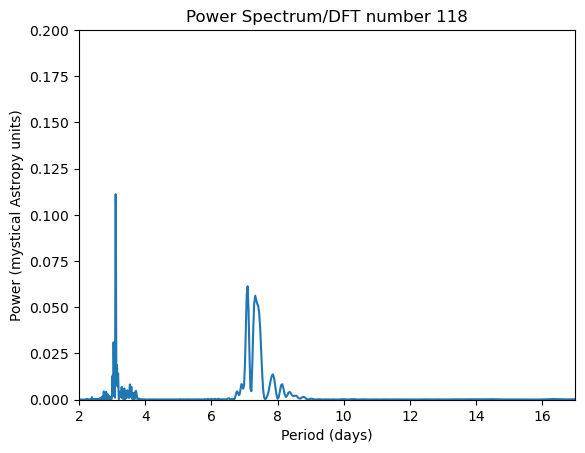

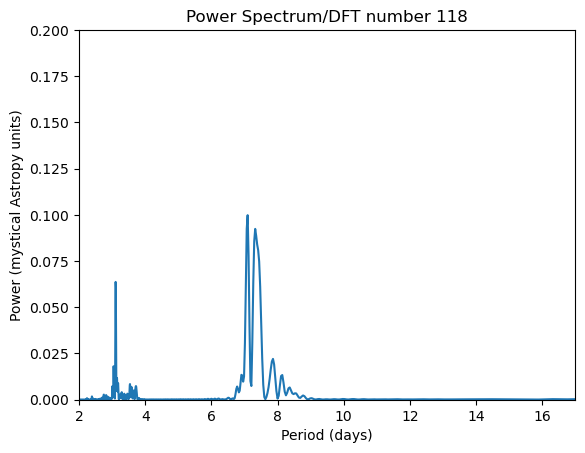

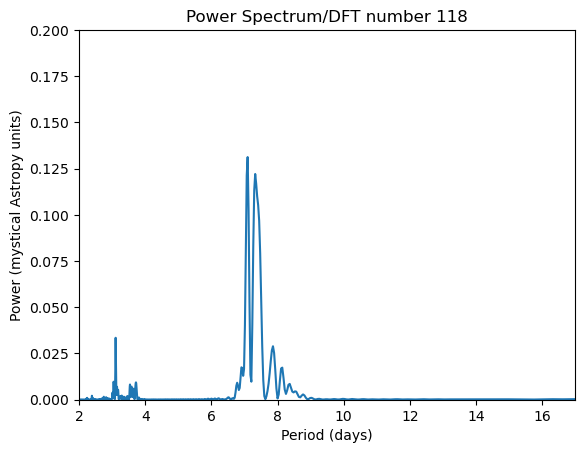

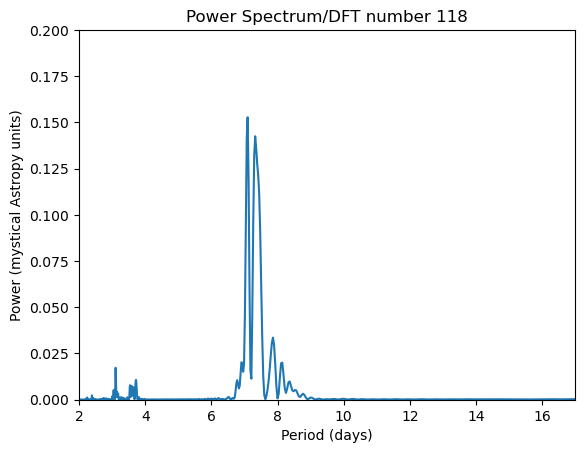

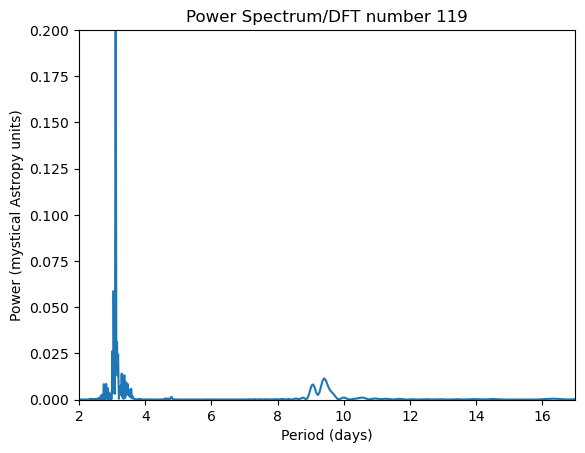

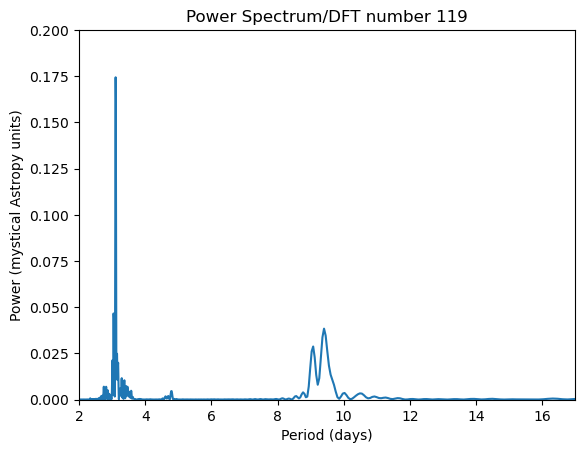

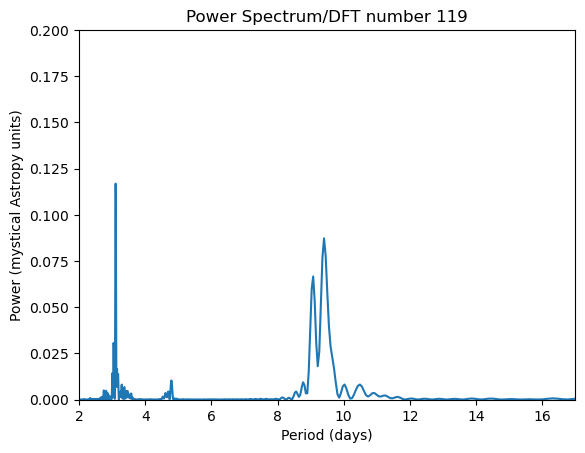

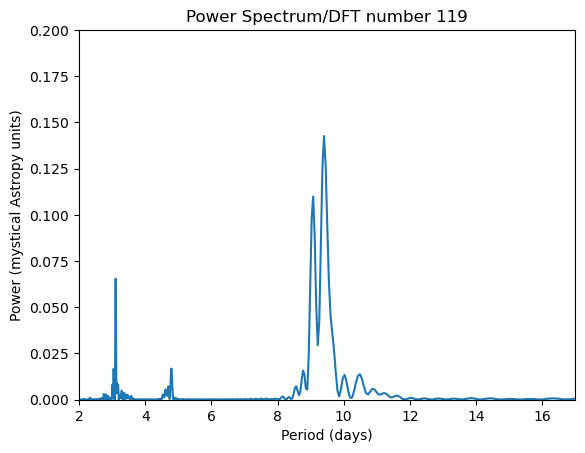

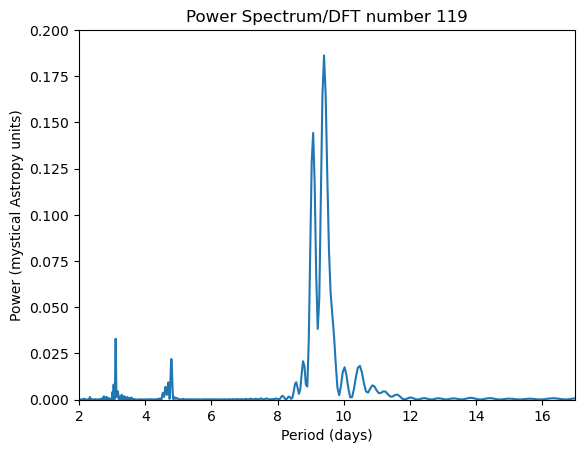

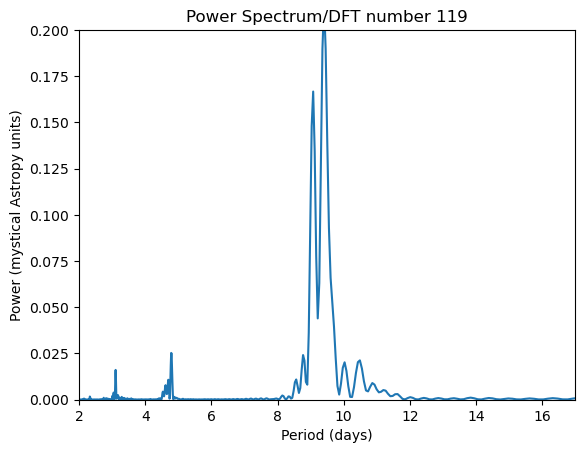

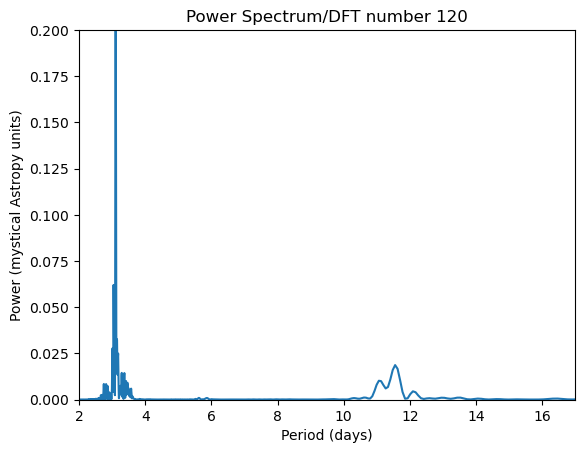

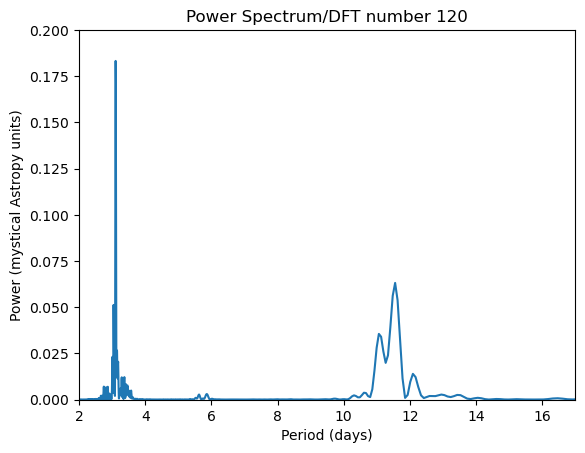

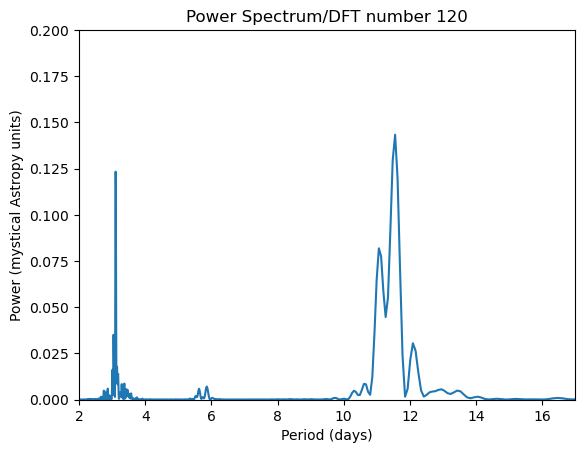

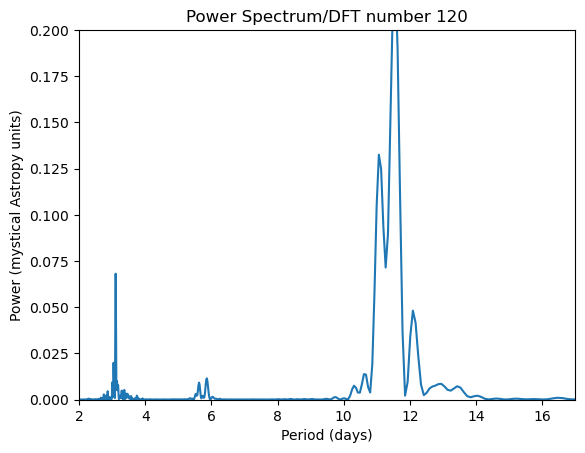

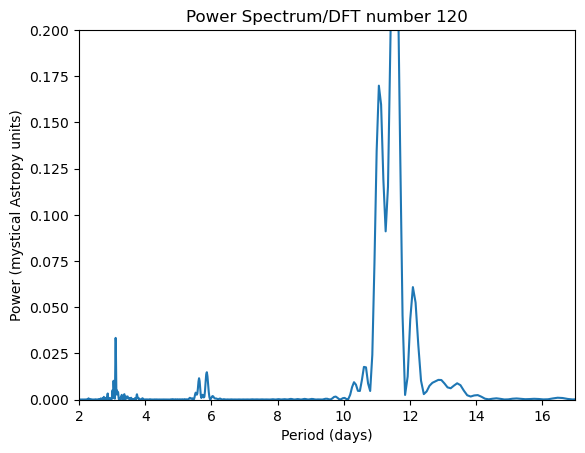

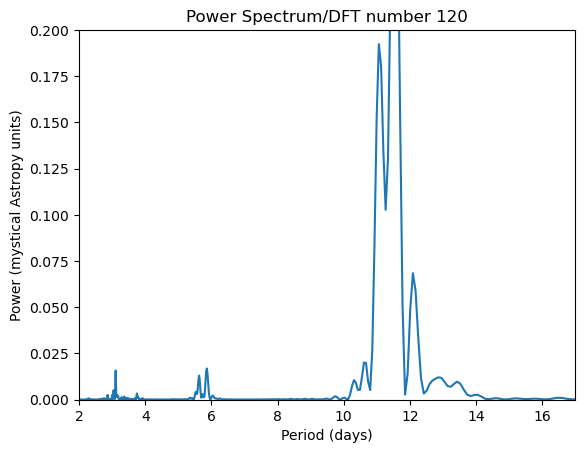

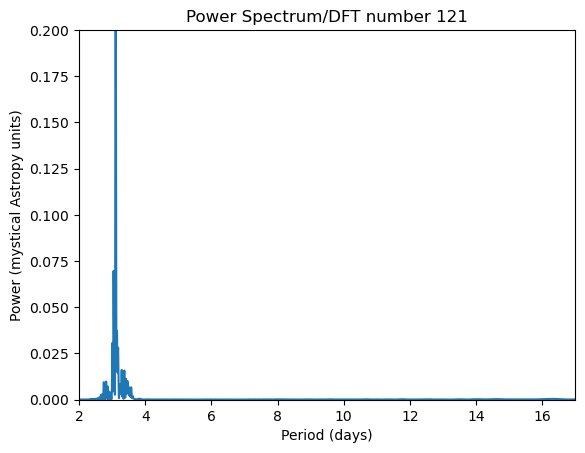

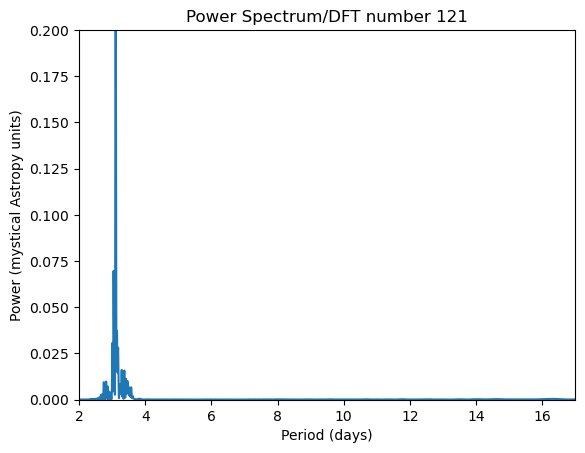

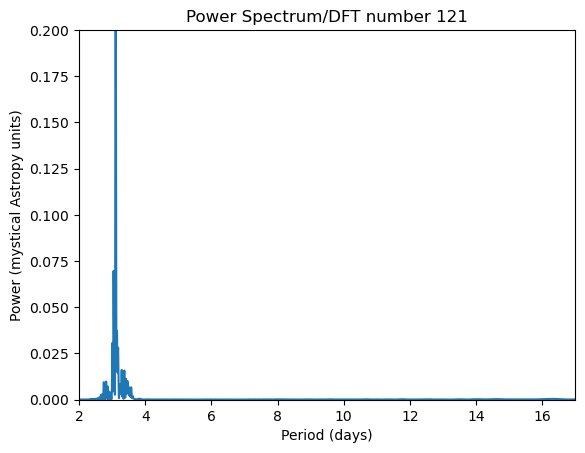

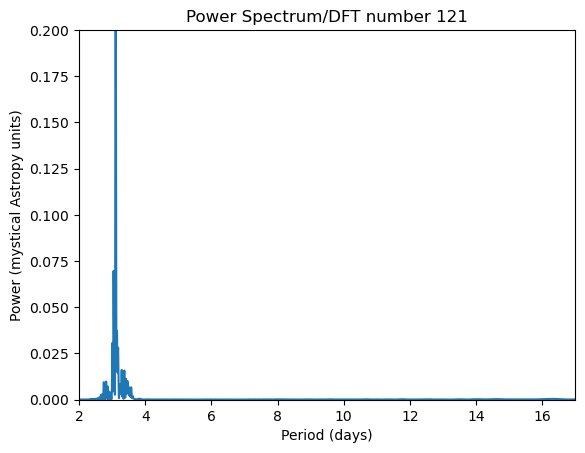

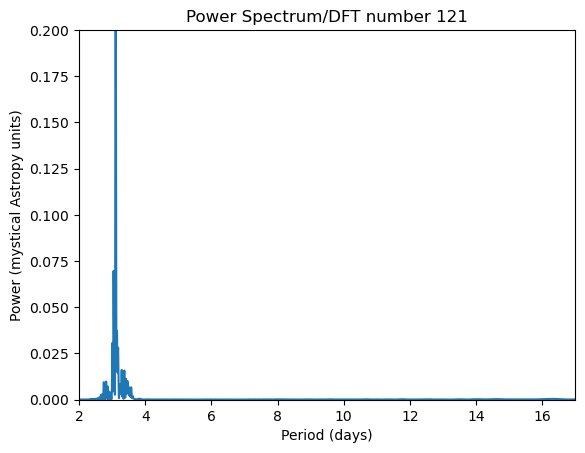

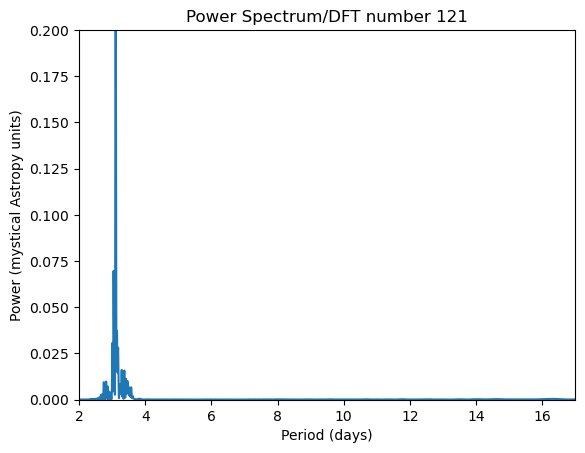

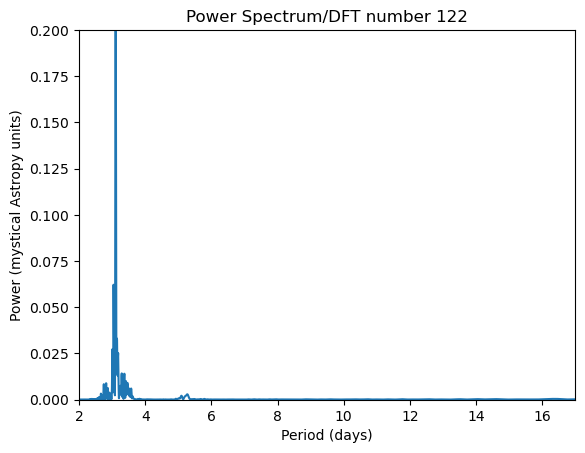

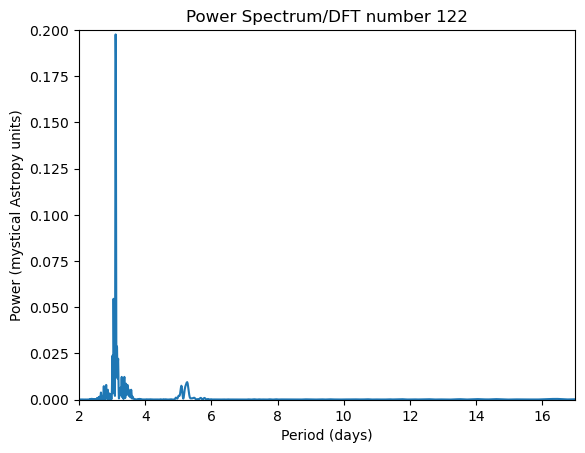

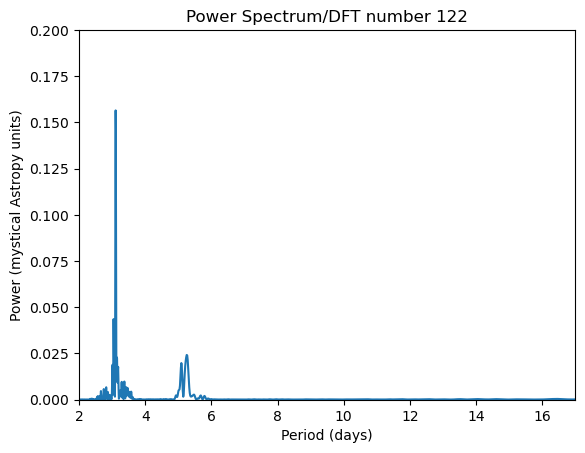

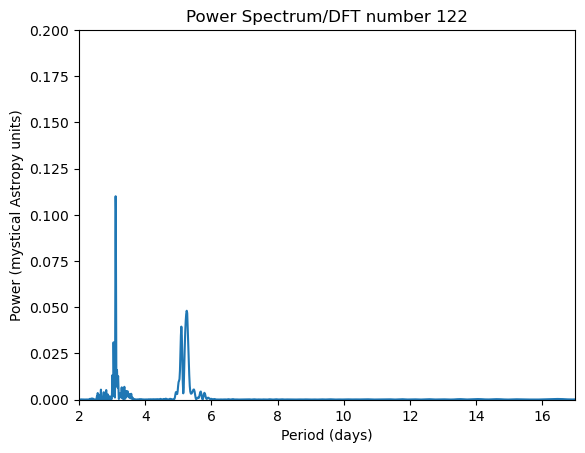

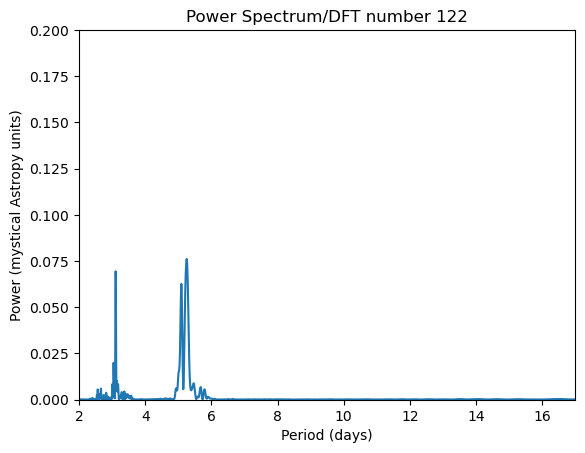

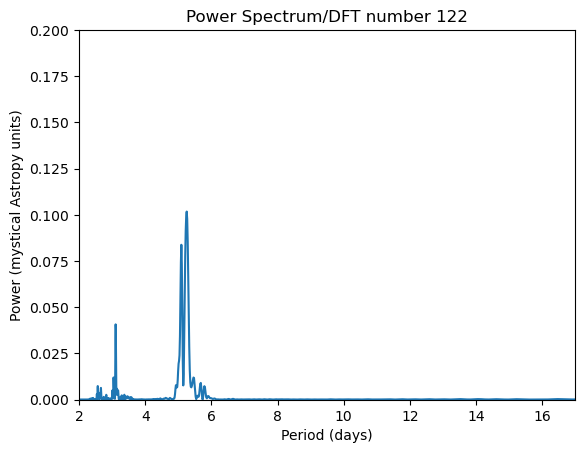

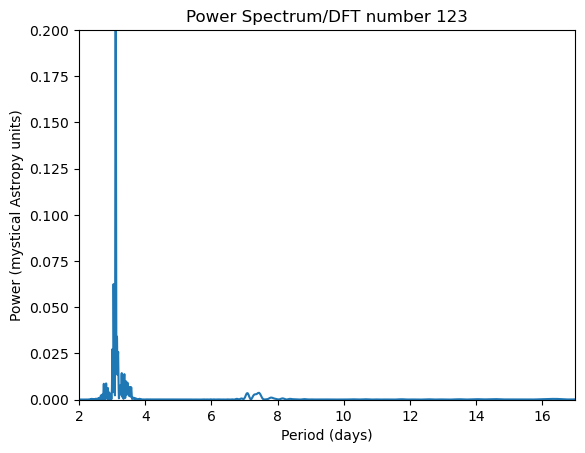

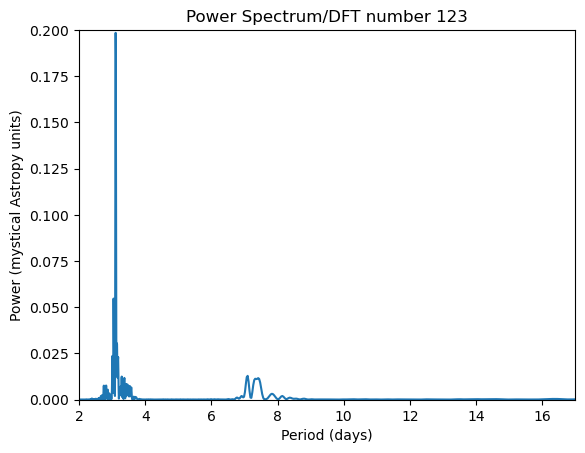

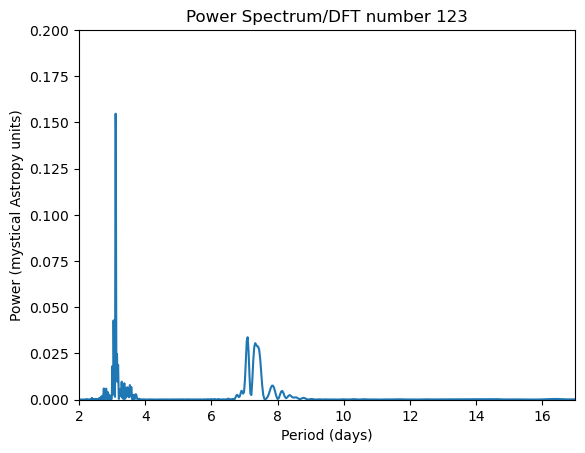

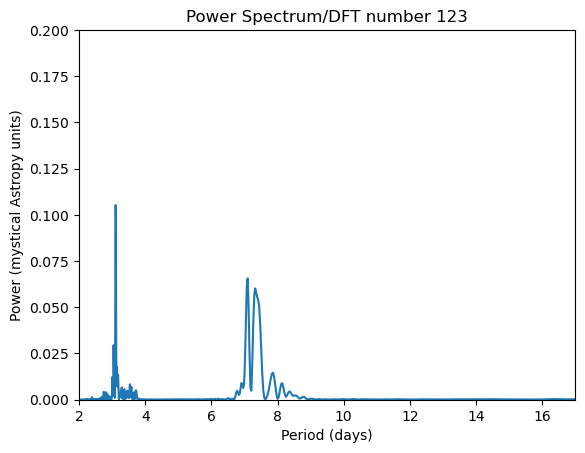

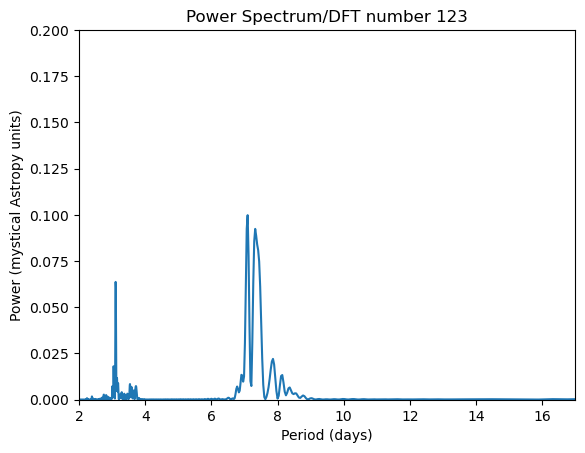

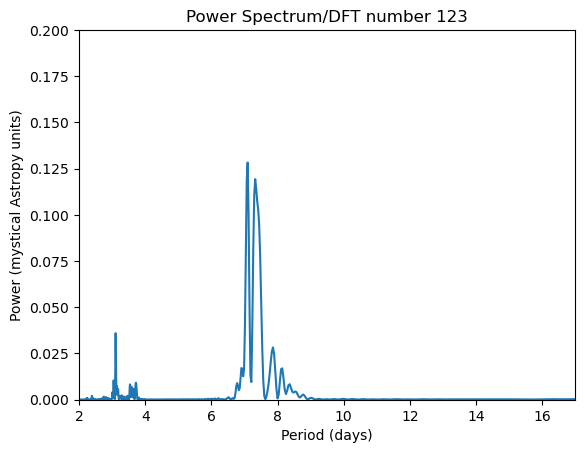

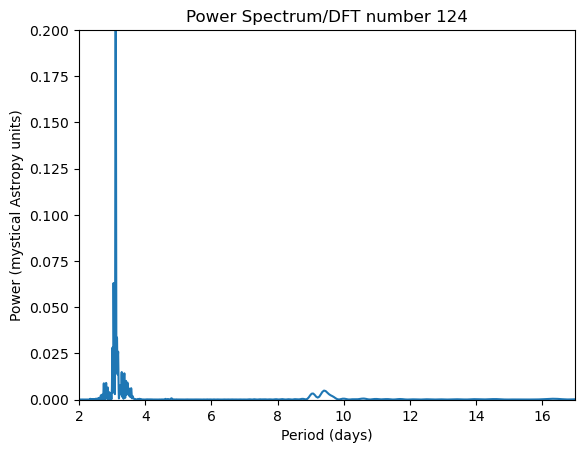

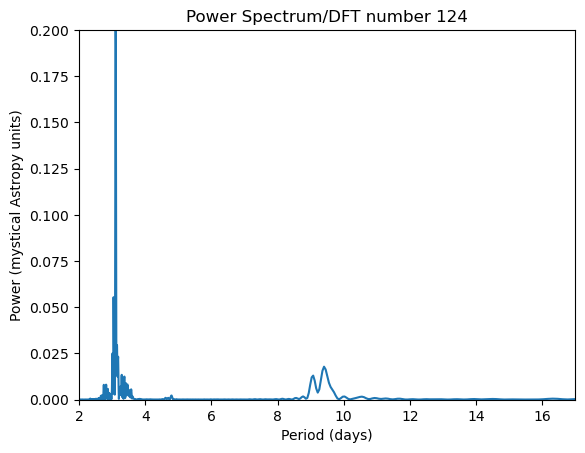

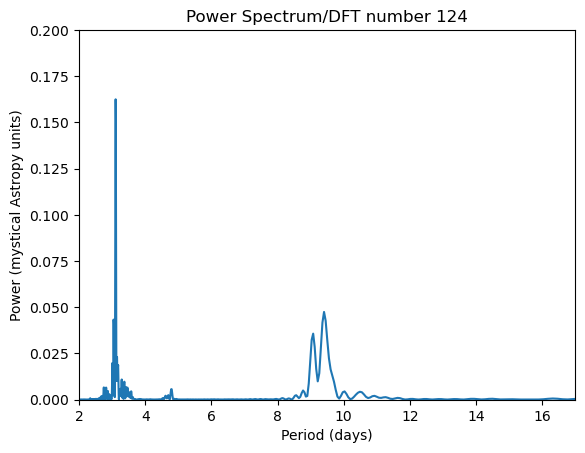

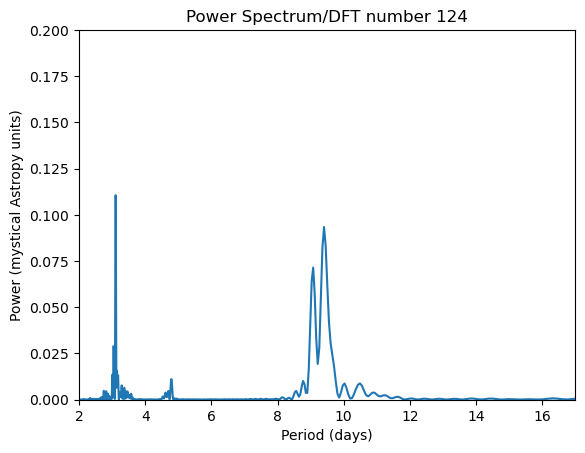

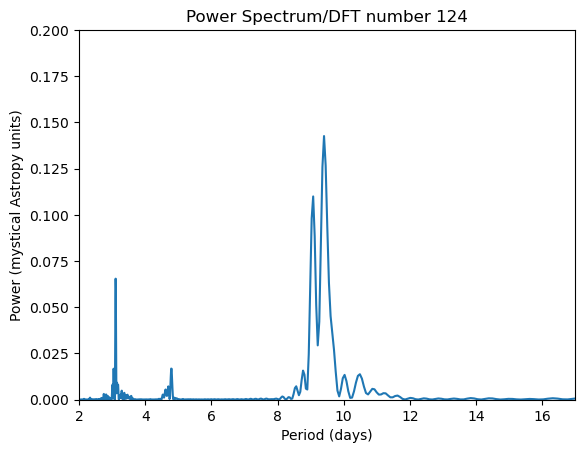

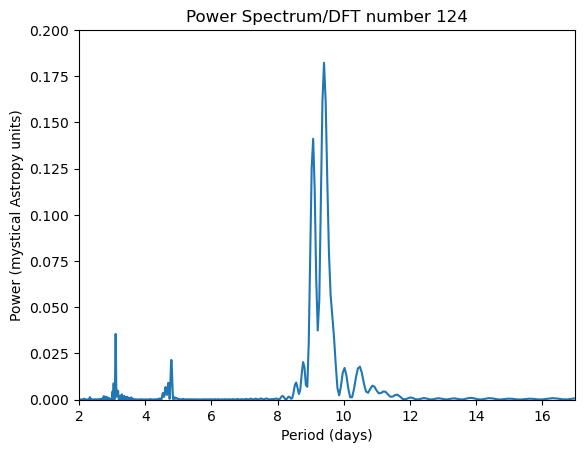

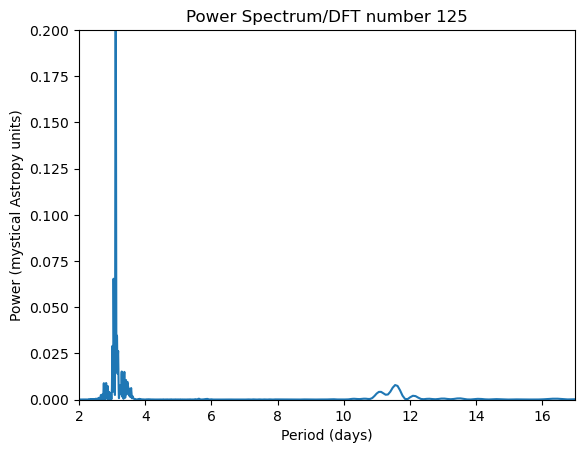

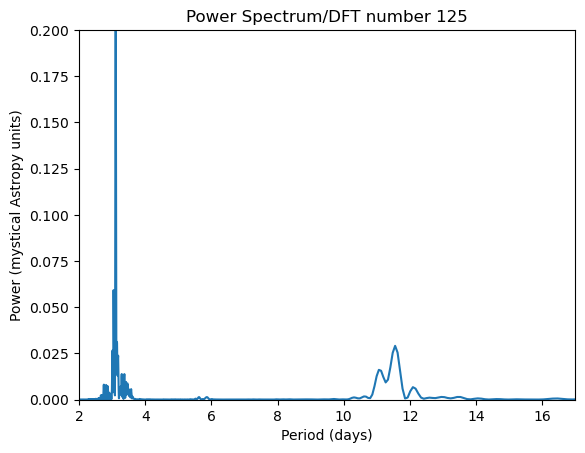

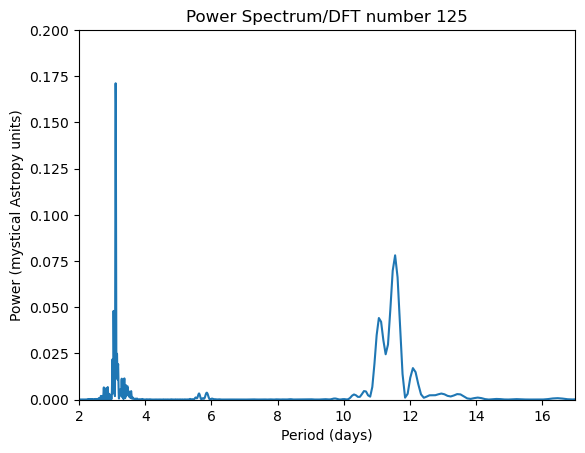

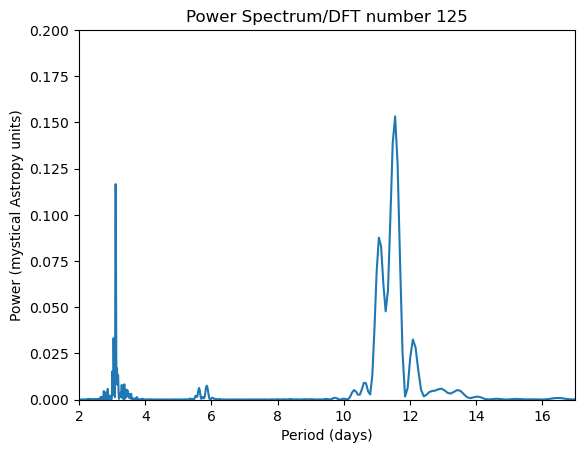

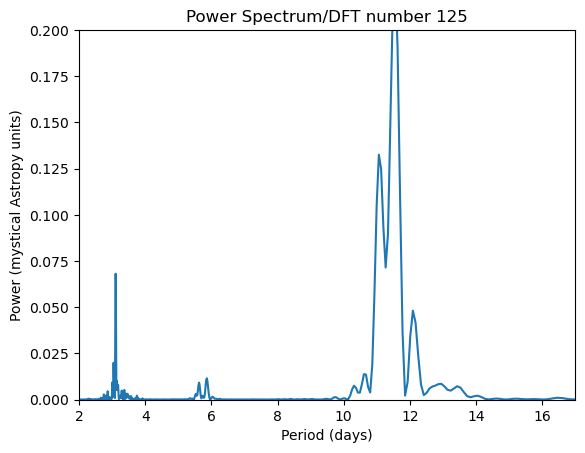

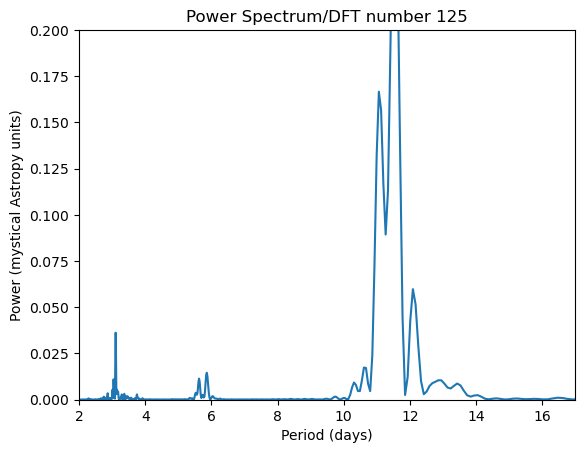

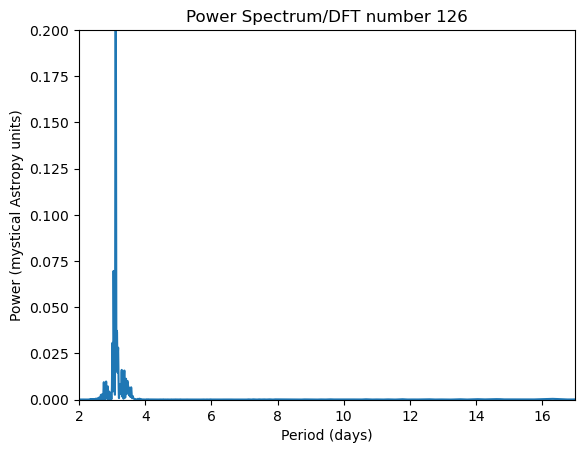

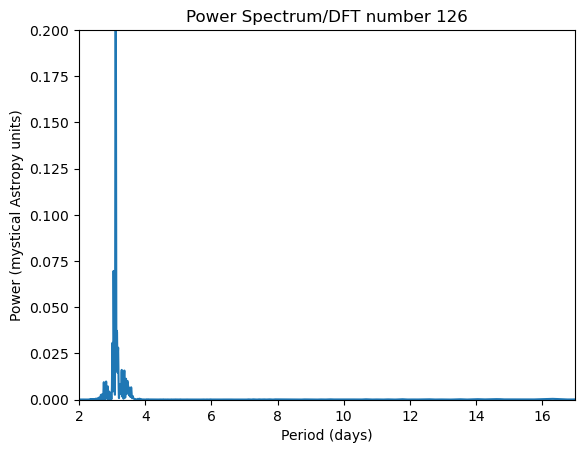

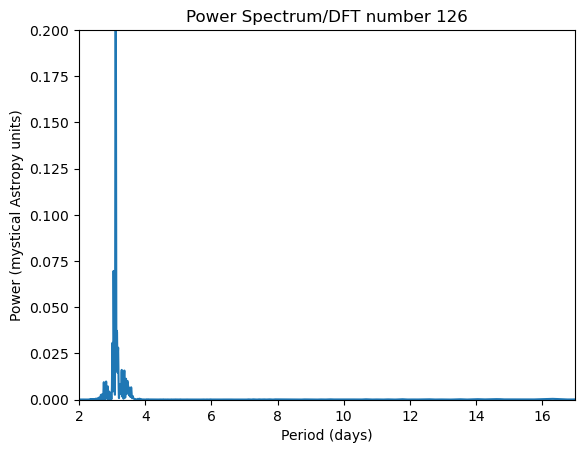

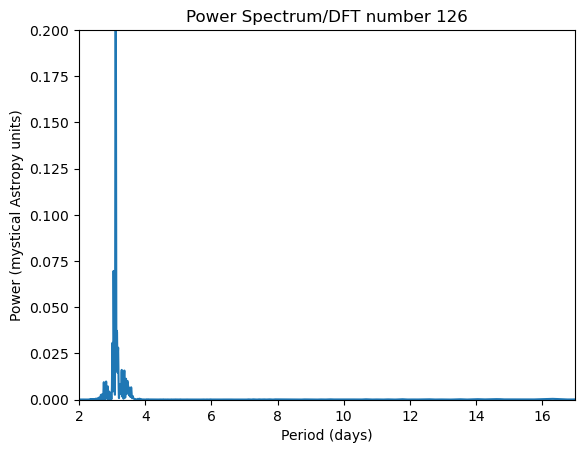

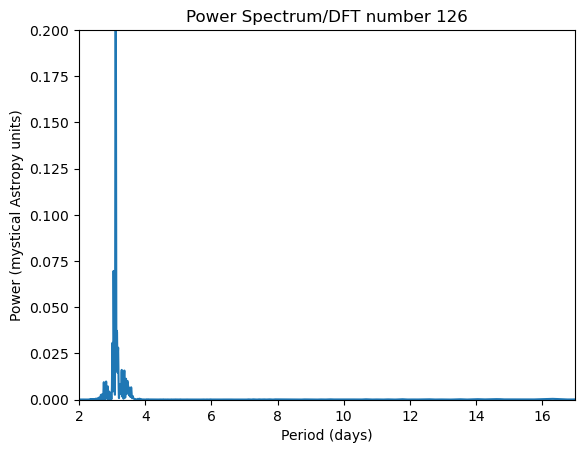

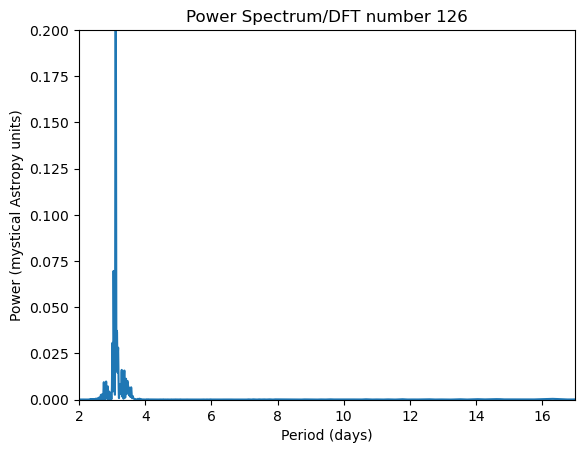

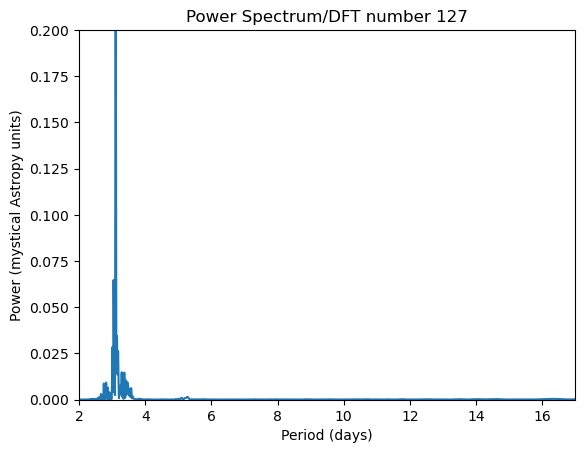

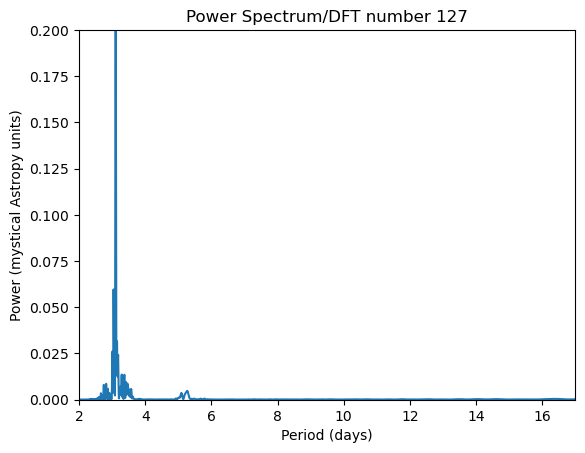

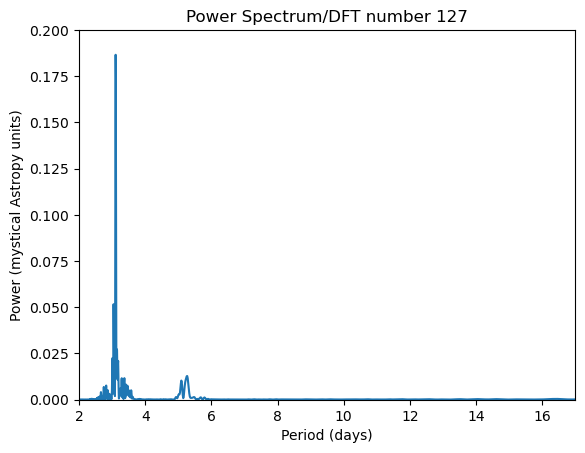

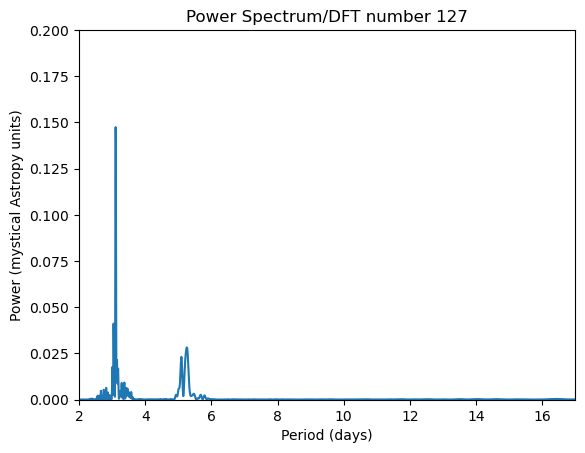

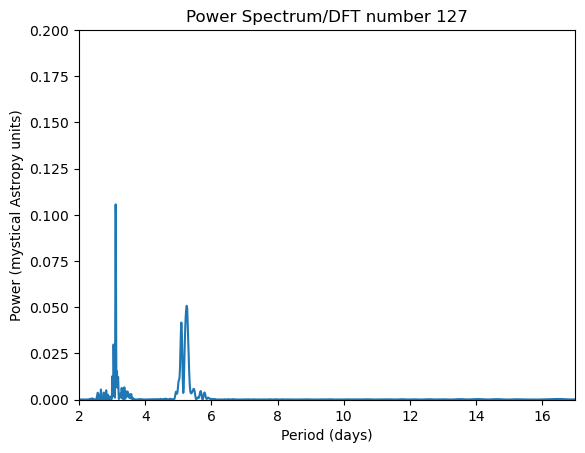

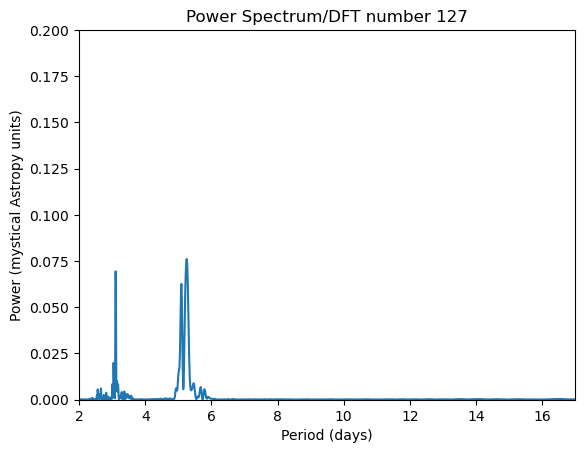

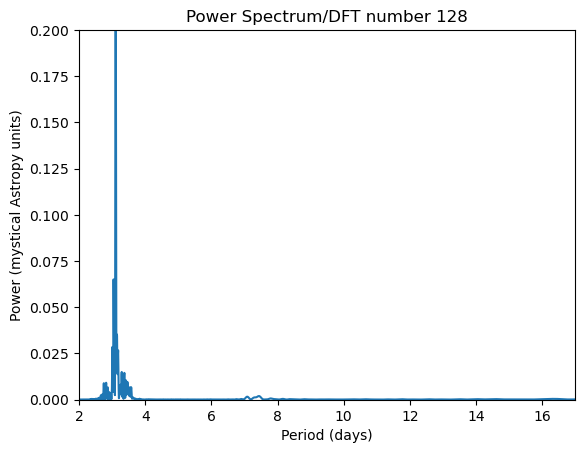

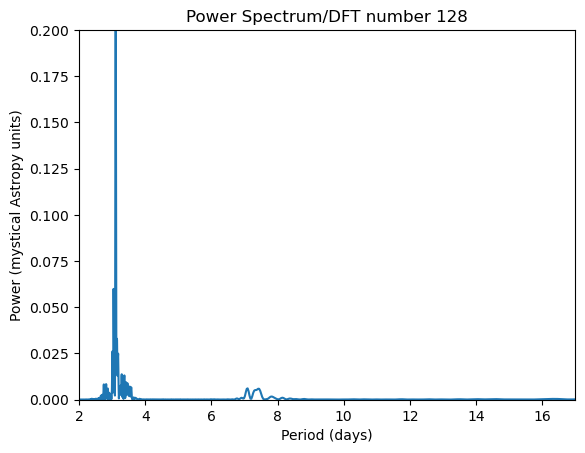

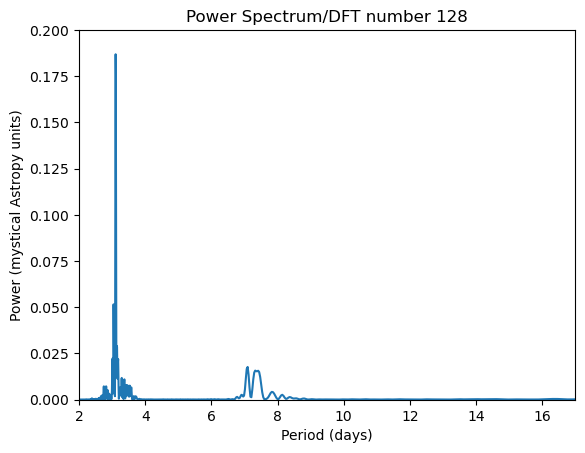

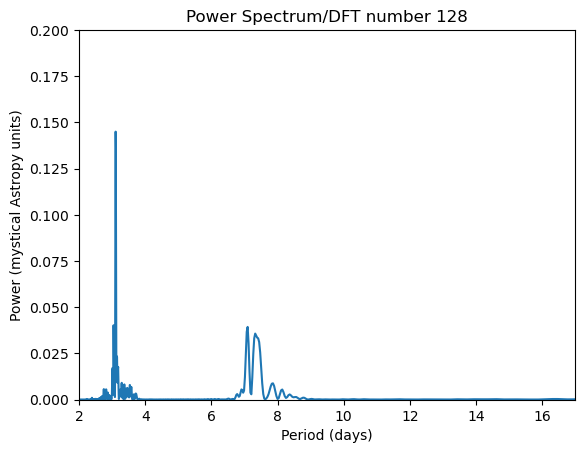

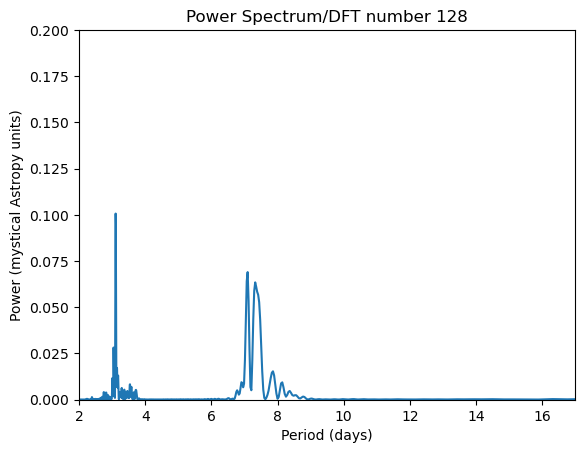

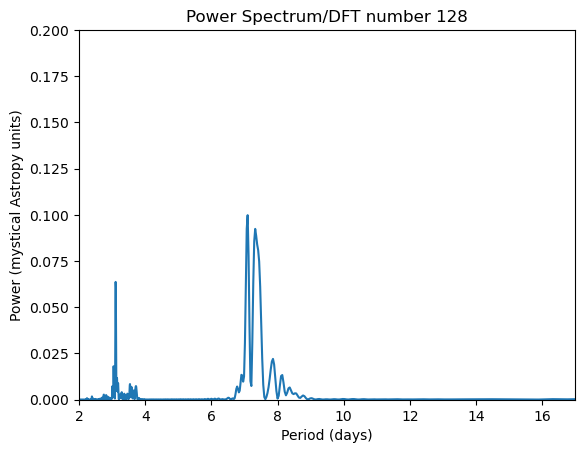

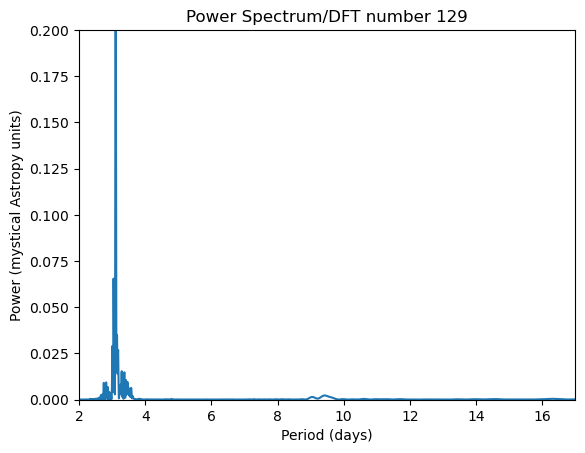

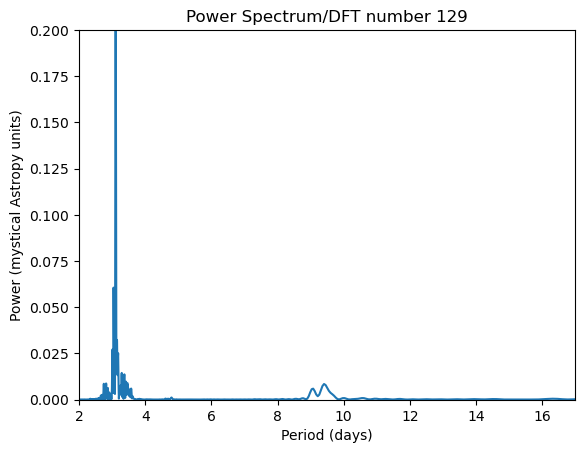

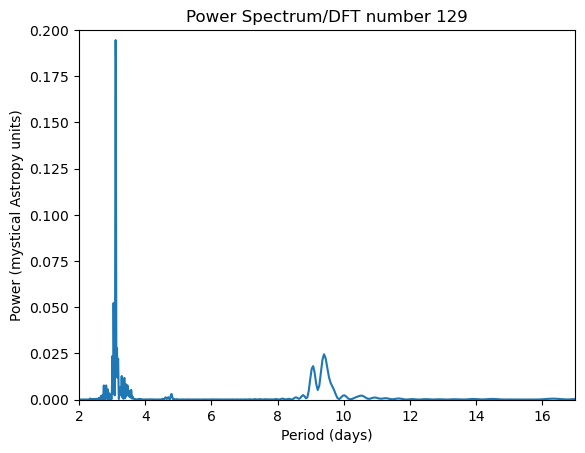

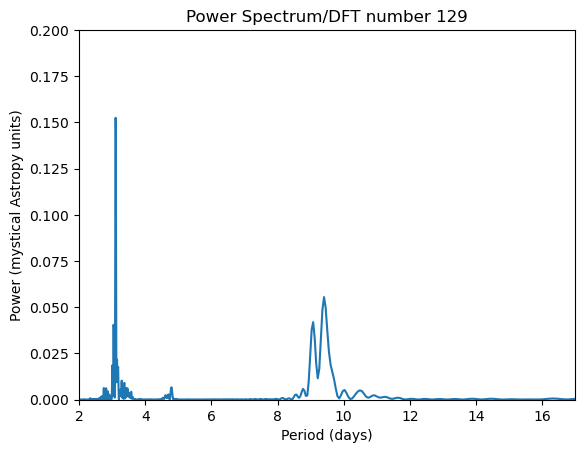

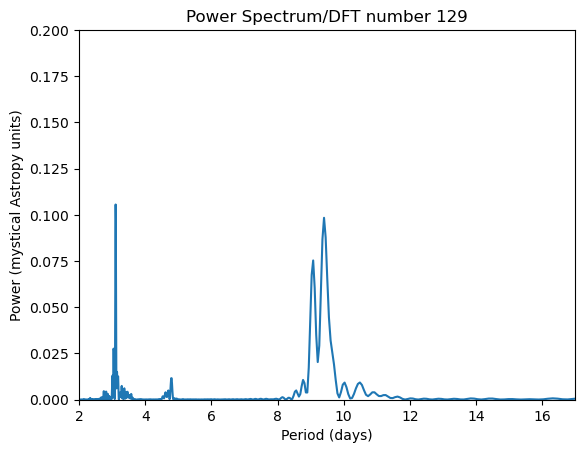

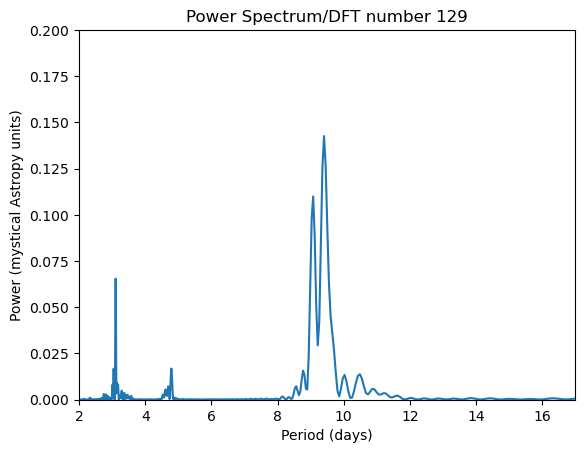

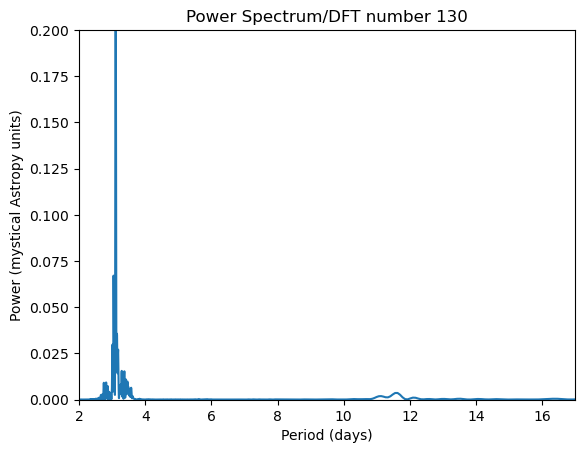

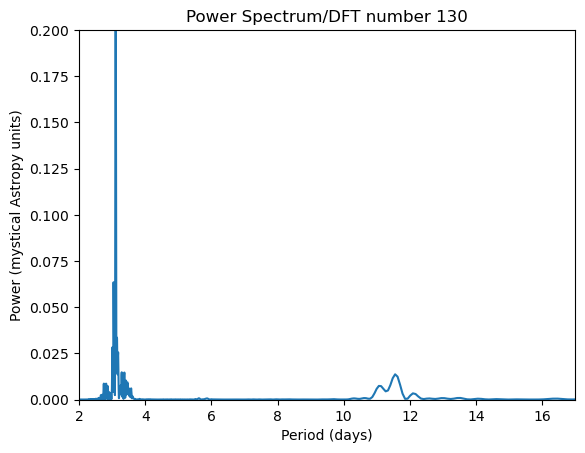

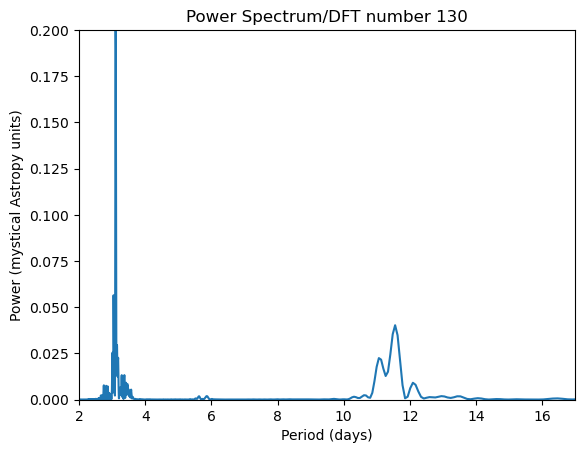

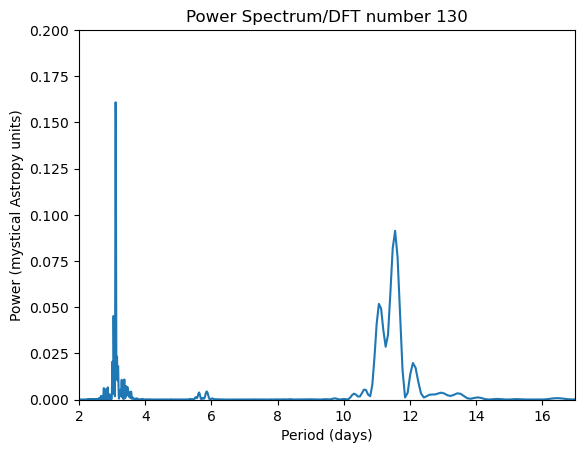

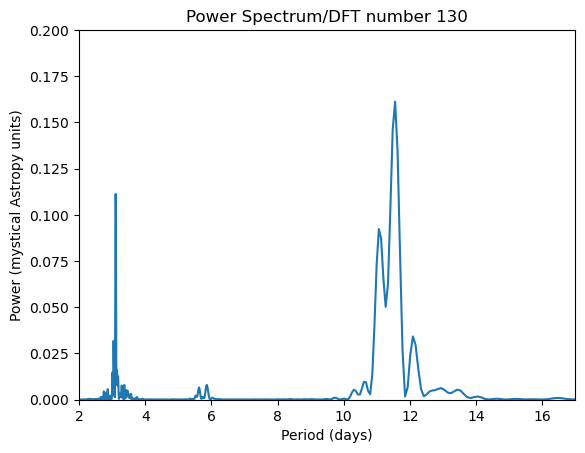

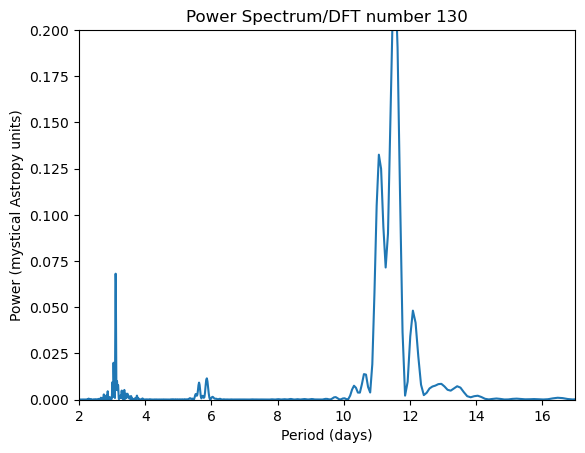

2


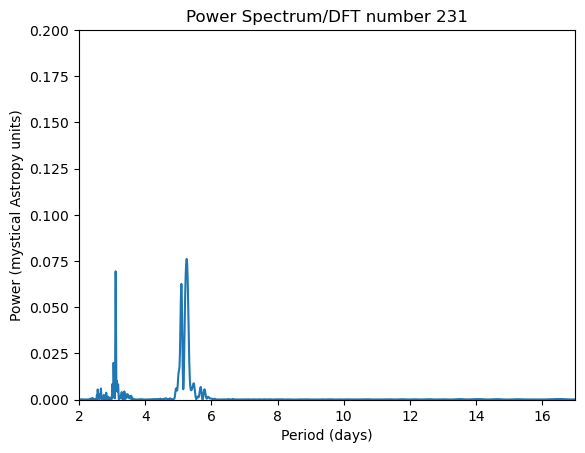

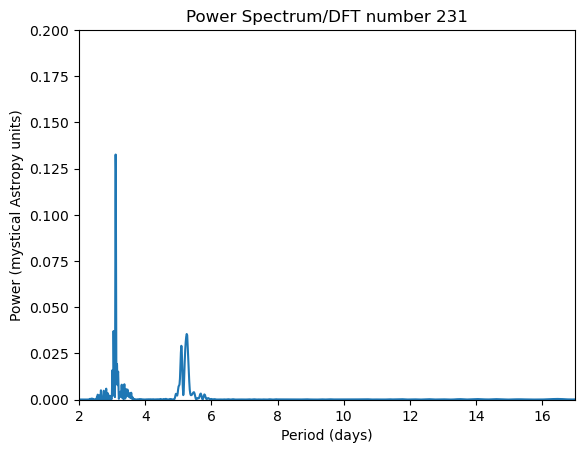

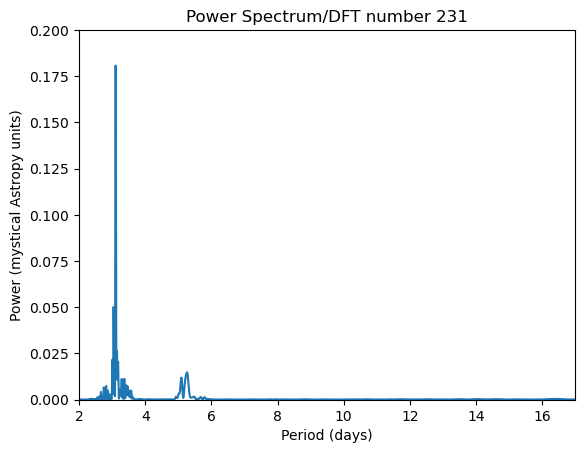

KeyboardInterrupt: 

In [63]:
def ScalingMany():
    global TotalFlux
    global StarFlux1
    global StarFlux2
    
    p = 1
    l = 1
    
    temps = np.linspace(3200, 6300, 6)   
    
    for star1 in all_stars:
        print(p)
        for t1 in temps:
            for star2 in all_stars:
                j = 0
                for t2 in temps:
                    F1 = (t1/t2)**4
                    StarFlux1 = star1['flux'] * F1
                    StarFlux2 = star2['flux'] 
                    TotalFlux = StarFlux1 + StarFlux2
                    TotalFlux = TotalFlux/max(TotalFlux)
                    time_short = np.arange(0, 365, 1)
                    frequencyTotal, powerTotal = LombScargle(time_short, TotalFlux[0:365]).autopower()
                    plt.plot(1/frequencyTotal, powerTotal)
                    plt.xlim(2, 17) #Due to the Nyquist Frequency
                    plt.ylim(-.0001, .2)
                    plt.xlabel('Period (days)')
                    plt.ylabel('Power (mystical Astropy units)')
                    plt.title(f'Power Spectrum/DFT number {p}{l}')
                    #plt.savefig('Blended Light Curve Power Spectrum')
                    plt.show()
                    
                l = l + 1
        p = p + 1
    
    
ScalingMany()

### Extra Code for Later

In [ ]:
periods = np.arange(1, 10, .1)
all_stars = [0] * len(periods)
i = 0
for p in periods:
    star = bp.regions(
    butterfly=True, 
    activity_rate=.1, 
    cycle_length=5, 
    cycle_overlap=1, 
    decay_time=(p*5),
    max_ave_lat=45, 
    min_ave_lat=20,
    alpha_med=(3*3e-4)
    )

    spots = bp.Spots(
    star, 
    alpha_med=(3*3e-4), 
    period=p,
    incl=1, 
    decay_timescale=10, 
    diffrot_shear=0.25
    )
    
    time = np.arange(0, 365, 1)
    flux = 1 + spots.calc(time)
    lc = pd.DataFrame(np.c_[time, flux], columns=['time', 'flux'])
    
    all_stars[i] = lc
    i += 1
    print(f'star {i}')

    
#cuda (pip install cuda for anaconda)

In [ ]:
ani = spots.ortho_animation(time, lc, interval=200, fig_kw=dict(figsize=(3, 3.6)));
ani.save("surface.gif", writer="imagemagick", dpi=200, fps=5)